In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
from sklearn.preprocessing import LabelEncoder


In [14]:
stock_prices=pd.read_csv('daily_trade_prices.csv')
trades = pd.read_csv('trades.csv')
dim_customer = pd.read_csv('dim_customer.csv')
dim_date = pd.read_csv('dim_date.csv')
dim_stock = pd.read_csv('dim_stock.csv')

# Daily Stock Prices Data Set

In [15]:
stock_prices.head()

,date,STK001,STK002,STK003,STK004,STK005,STK006,STK007,STK008,STK009,...,STK011,STK012,STK013,STK014,STK015,STK016,STK017,STK018,STK019,STK020
0,2023-01-02,130.215257,143.732847,10.829021,41.721087,145.478750,136.613229,193.549026,154.597180,190.646814,...,66.629920,30.019335,158.546534,132.388352,19.155342,78.409589,191.791965,105.076218,92.218536,96.962925
1,2023-01-03,127.931982,141.811103,10.840378,42.372205,150.451171,131.081439,189.433498,156.245870,188.642260,...,67.403967,NaN,157.962636,132.316777,19.495879,81.278706,196.519348,105.143629,93.324523,NaN
2,2023-01-04,126.531338,139.814796,10.824561,43.273956,150.121855,132.287593,185.192571,153.568772,199.054913,...,65.541600,28.336211,157.022235,128.554686,19.489534,79.565899,195.192089,106.084249,93.996184,96.034921
3,2023-01-05,127.837687,140.885311,10.874388,43.307331,154.264000,127.534322,189.023341,155.642891,NaN,...,66.558603,27.706730,154.660460,120.788272,18.989024,83.375297,193.497711,104.311590,92.687024,96.281810
4,2023-01-06,127.140842,143.103993,11.212466,46.389494,151.434469,125.356736,185.290655,155.942939,203.068155,...,67.339732,27.283299,159.619771,112.131796,18.700643,80.443424,189.787155,109.664184,88.463448,97.103757


In [16]:
stock_prices.info()
stock_prices.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    504 non-null    object 
 1   STK001  462 non-null    float64
 2   STK002  504 non-null    float64
 3   STK003  504 non-null    float64
 4   STK004  450 non-null    float64
 5   STK005  504 non-null    float64
 6   STK006  504 non-null    float64
 7   STK007  504 non-null    float64
 8   STK008  504 non-null    float64
 9   STK009  447 non-null    float64
 10  STK010  504 non-null    float64
 11  STK011  504 non-null    float64
 12  STK012  468 non-null    float64
 13  STK013  504 non-null    float64
 14  STK014  504 non-null    float64
 15  STK015  504 non-null    float64
 16  STK016  504 non-null    float64
 17  STK017  504 non-null    float64
 18  STK018  504 non-null    float64
 19  STK019  450 non-null    float64
 20  STK020  447 non-null    float64
dtypes: float64(20), object(1)
memory usage:

,STK001,STK002,STK003,STK004,STK005,STK006,STK007,STK008,STK009,STK010,STK011,STK012,STK013,STK014,STK015,STK016,STK017,STK018,STK019,STK020
count,462.000000,504.000000,504.000000,450.000000,504.000000,504.000000,504.000000,504.000000,447.000000,504.000000,504.000000,468.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,450.000000,447.000000
mean,73.238205,244.100783,18.613699,70.079679,118.119651,90.840386,144.137838,134.917071,385.828732,208.935922,80.533798,14.127433,130.328012,97.772363,18.775502,99.237435,158.404600,153.353919,49.994600,62.168241
std,34.957716,77.687785,4.207475,21.406187,34.374868,35.769128,14.337600,12.476715,85.293754,72.537670,5.271877,5.865185,19.172942,21.760270,2.380748,27.402439,29.789473,36.598541,16.552201,13.191803
min,34.777126,131.049903,10.824561,38.601760,64.112615,36.700463,120.582293,102.141669,188.642260,117.981340,65.541600,6.159503,91.626473,53.573700,13.073433,54.387697,116.074993,88.461445,30.479787,44.149604
25%,51.129147,166.219395,15.734831,53.605636,91.199819,51.138410,134.202791,126.104209,321.386311,148.320335,77.024487,9.552314,117.124849,80.358870,16.952671,76.012725,135.951816,129.300194,36.520028,51.002395
50%,59.600556,231.118590,18.505297,66.639674,108.535825,95.320580,140.679659,134.706533,377.454388,180.379824,80.789065,12.273066,128.661199,99.010655,19.005233,95.264963,146.144767,148.254446,45.974139,58.308000
75%,82.434208,331.255990,20.815200,83.040661,142.595110,121.136085,150.682253,143.521293,447.269737,262.844855,84.053107,18.992370,148.752093,113.955124,20.761443,124.671982,180.134788,178.068028,56.151881,73.119995
max,185.760327,364.537923,32.471581,140.893661,219.282017,151.990790,193.549026,162.286078,643.439990,405.450480,94.372496,30.019335,169.446176,165.223676,23.405962,165.456114,234.074568,248.857830,98.248350,104.111733


Checking for duplicate rows

In [17]:
duplicates = stock_prices[stock_prices.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [date, STK001, STK002, STK003, STK004, STK005, STK006, STK007, STK008, STK009, STK010, STK011, STK012, STK013, STK014, STK015, STK016, STK017, STK018, STK019, STK020]
Index: []

[0 rows x 21 columns]


Detecting Missing Data

In [18]:
sum_null=stock_prices.isnull().sum()
print(sum_null)

date       0
STK001    42
STK002     0
STK003     0
STK004    54
STK005     0
STK006     0
STK007     0
STK008     0
STK009    57
STK010     0
STK011     0
STK012    36
STK013     0
STK014     0
STK015     0
STK016     0
STK017     0
STK018     0
STK019    54
STK020    57
dtype: int64


In [82]:
perc_null=(stock_prices.isnull().sum()/stock_prices.isnull().count())*100
print(perc_null)

date       0.000000
STK001     8.333333
STK002     0.000000
STK003     0.000000
STK004    10.714286
STK005     0.000000
STK006     0.000000
STK007     0.000000
STK008     0.000000
STK009    11.309524
STK010     0.000000
STK011     0.000000
STK012     7.142857
STK013     0.000000
STK014     0.000000
STK015     0.000000
STK016     0.000000
STK017     0.000000
STK018     0.000000
STK019    10.714286
STK020    11.309524
dtype: float64


In [19]:
missing_rows = stock_prices[stock_prices.isnull().any(axis=1)].copy()

missing_rows['Missing Count'] = missing_rows.isnull().sum(axis=1)
missing_rows['Missing Columns'] = missing_rows.isnull().apply(lambda x: list(x[x].index), axis=1)


#display(missing_rows[['date', 'Missing Count', 'Missing Columns']])
print(missing_rows[['date', 'Missing Count', 'Missing Columns']].to_string(index=False))

      date  Missing Count          Missing Columns
2023-01-03              2         [STK012, STK020]
2023-01-05              1                 [STK009]
2023-01-09              1                 [STK012]
2023-01-11              1                 [STK012]
2023-01-19              1                 [STK009]
2023-01-27              1                 [STK019]
2023-01-30              1                 [STK009]
2023-01-31              1                 [STK020]
2023-02-01              1                 [STK020]
2023-02-03              2         [STK004, STK019]
2023-02-06              2         [STK001, STK004]
2023-02-07              1                 [STK009]
2023-02-09              1                 [STK009]
2023-02-13              1                 [STK019]
2023-02-14              1                 [STK019]
2023-02-15              1                 [STK020]
2023-02-16              1                 [STK009]
2023-02-20              1                 [STK001]
2023-02-22              2      

In [20]:
missing_rows = stock_prices[stock_prices.isnull().any(axis=1)]
display(missing_rows)

,date,STK001,STK002,STK003,STK004,STK005,STK006,STK007,STK008,STK009,...,STK011,STK012,STK013,STK014,STK015,STK016,STK017,STK018,STK019,STK020
1,2023-01-03,127.931982,141.811103,10.840378,42.372205,150.451171,131.081439,189.433498,156.245870,188.642260,...,67.403967,NaN,157.962636,132.316777,19.495879,81.278706,196.519348,105.143629,93.324523,NaN
3,2023-01-05,127.837687,140.885311,10.874388,43.307331,154.264000,127.534322,189.023341,155.642891,NaN,...,66.558603,27.706730,154.660460,120.788272,18.989024,83.375297,193.497711,104.311590,92.687024,96.281810
5,2023-01-09,123.367730,140.319325,11.316832,41.094506,150.961867,130.114880,184.968753,154.965905,205.014247,...,67.496708,NaN,157.148505,110.660899,18.928105,85.918530,190.526743,106.836633,88.030031,96.613740
7,2023-01-11,131.820541,138.932481,11.287117,43.907521,143.763444,136.696267,181.553836,157.363992,227.660545,...,66.663323,NaN,156.935020,116.486609,19.726953,76.839603,188.849171,104.995574,86.069418,100.233116
13,2023-01-19,150.504725,140.300618,12.409682,44.133964,147.799145,142.071956,182.608973,157.454599,NaN,...,68.189089,27.241209,166.476939,128.697500,21.374910,80.390200,182.710390,104.814764,96.963391,100.880294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2024-11-18,70.180929,339.462932,31.899557,117.462175,175.543337,52.299835,136.499016,157.162931,NaN,...,81.548946,6.726688,94.419347,99.671247,21.054098,73.508658,206.646878,139.196378,40.644029,62.281166
491,2024-11-19,NaN,339.980361,31.764230,116.702427,155.770463,51.437878,133.932610,158.908203,485.397118,...,83.001164,6.768696,95.569649,98.300227,20.373932,78.029762,208.297320,137.501580,40.690793,61.691402
493,2024-11-21,67.082678,333.436273,31.985937,119.685695,150.770517,54.848529,131.902301,151.670425,499.331300,...,87.050071,NaN,96.947072,106.324216,19.529200,78.671808,210.310837,138.405844,41.866879,65.792008
496,2024-11-26,68.027249,326.263292,32.136155,132.342427,148.840297,46.768391,130.930402,147.886581,NaN,...,86.545783,6.780244,96.399469,101.406016,19.235266,76.259875,214.056795,130.160846,42.852334,63.589817


Data Statistics

In [21]:
stock_prices.skew(numeric_only=True)

STK001    1.574379
STK002    0.148758
STK003    0.930422
STK004    0.800456
STK005    0.699879
STK006   -0.069730
STK007    1.194659
STK008   -0.219149
STK009    0.316560
STK010    0.741059
STK011   -0.132027
STK012    0.781601
STK013    0.003077
STK014   -0.021617
STK015   -0.262707
STK016    0.246428
STK017    0.714551
STK018    0.403219
STK019    1.102480
STK020    0.870008
dtype: float64

In [86]:
corr_matrix = stock_prices.corr(numeric_only=True)
corr_matrix

,STK001,STK002,STK003,STK004,STK005,STK006,STK007,STK008,STK009,STK010,STK011,STK012,STK013,STK014,STK015,STK016,STK017,STK018,STK019,STK020
STK001,1.000000,-0.689865,-0.636517,-0.592266,0.439983,0.711764,0.435746,-0.131033,-0.716679,-0.358071,-0.437794,0.870484,0.752958,0.155832,0.406525,-0.620200,0.294851,-0.086994,0.842791,0.754373
STK002,-0.689865,1.000000,0.732217,0.752940,0.126417,-0.927619,-0.385776,0.313618,0.871083,0.833688,0.094535,-0.843169,-0.874789,0.260585,-0.265822,0.776379,0.171667,-0.411773,-0.594624,-0.728964
STK003,-0.636517,0.732217,1.000000,0.834750,-0.000861,-0.625271,-0.308493,0.334017,0.732184,0.745092,0.197664,-0.786548,-0.835796,0.134623,-0.298350,0.431314,0.103161,-0.116625,-0.618806,-0.617555
STK004,-0.592266,0.752940,0.834750,1.000000,-0.026281,-0.650312,-0.317763,0.373425,0.749005,0.757666,0.113977,-0.709264,-0.716949,0.232797,-0.429954,0.535234,0.003740,-0.159609,-0.511176,-0.600500
STK005,0.439983,0.126417,-0.000861,-0.026281,1.000000,-0.093970,-0.060478,0.279928,0.123006,0.311474,-0.313919,0.100535,-0.047439,0.330083,0.246390,0.000160,0.570474,-0.519649,0.297114,0.154206
STK006,0.711764,-0.927619,-0.625271,-0.650312,-0.093970,1.000000,0.442999,-0.224143,-0.821783,-0.718802,-0.256353,0.795570,0.817178,-0.153662,0.223614,-0.711044,-0.182435,0.407722,0.597313,0.627702
STK007,0.435746,-0.385776,-0.308493,-0.317763,-0.060478,0.442999,1.000000,-0.042006,-0.509643,-0.182517,-0.480123,0.546599,0.413835,0.245135,0.019693,-0.207902,-0.104657,-0.069027,0.517387,0.392566
STK008,-0.131033,0.313618,0.334017,0.373425,0.279928,-0.224143,-0.042006,1.000000,0.277512,0.260543,-0.302758,-0.333967,-0.366350,0.220897,0.046951,0.388530,0.206886,-0.081781,-0.237767,-0.198796
STK009,-0.716679,0.871083,0.732184,0.749005,0.123006,-0.821783,-0.509643,0.277512,1.000000,0.711470,0.168883,-0.818583,-0.807835,0.141399,-0.389364,0.654499,0.096206,-0.322729,-0.617618,-0.697685
STK010,-0.358071,0.833688,0.745092,0.757666,0.311474,-0.718802,-0.182517,0.260543,0.711470,1.000000,-0.140272,-0.580257,-0.718168,0.397783,-0.220449,0.476487,0.311559,-0.457246,-0.257485,-0.441554


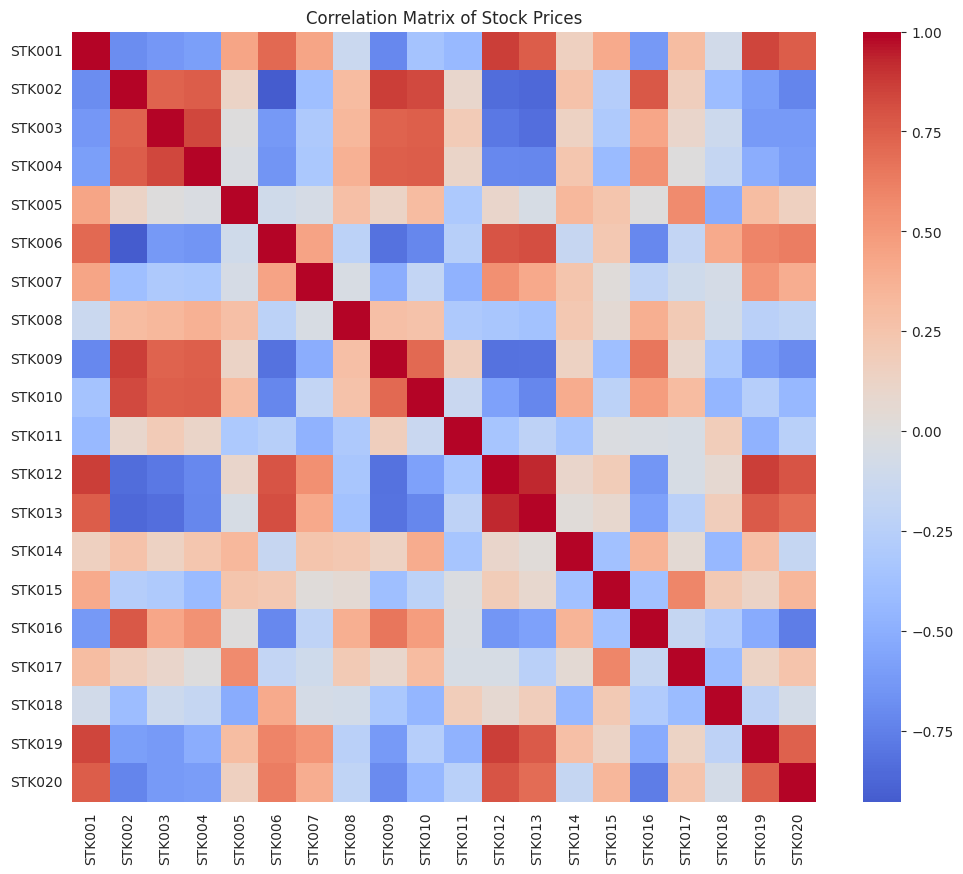

In [87]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Stock Prices")
plt.show()

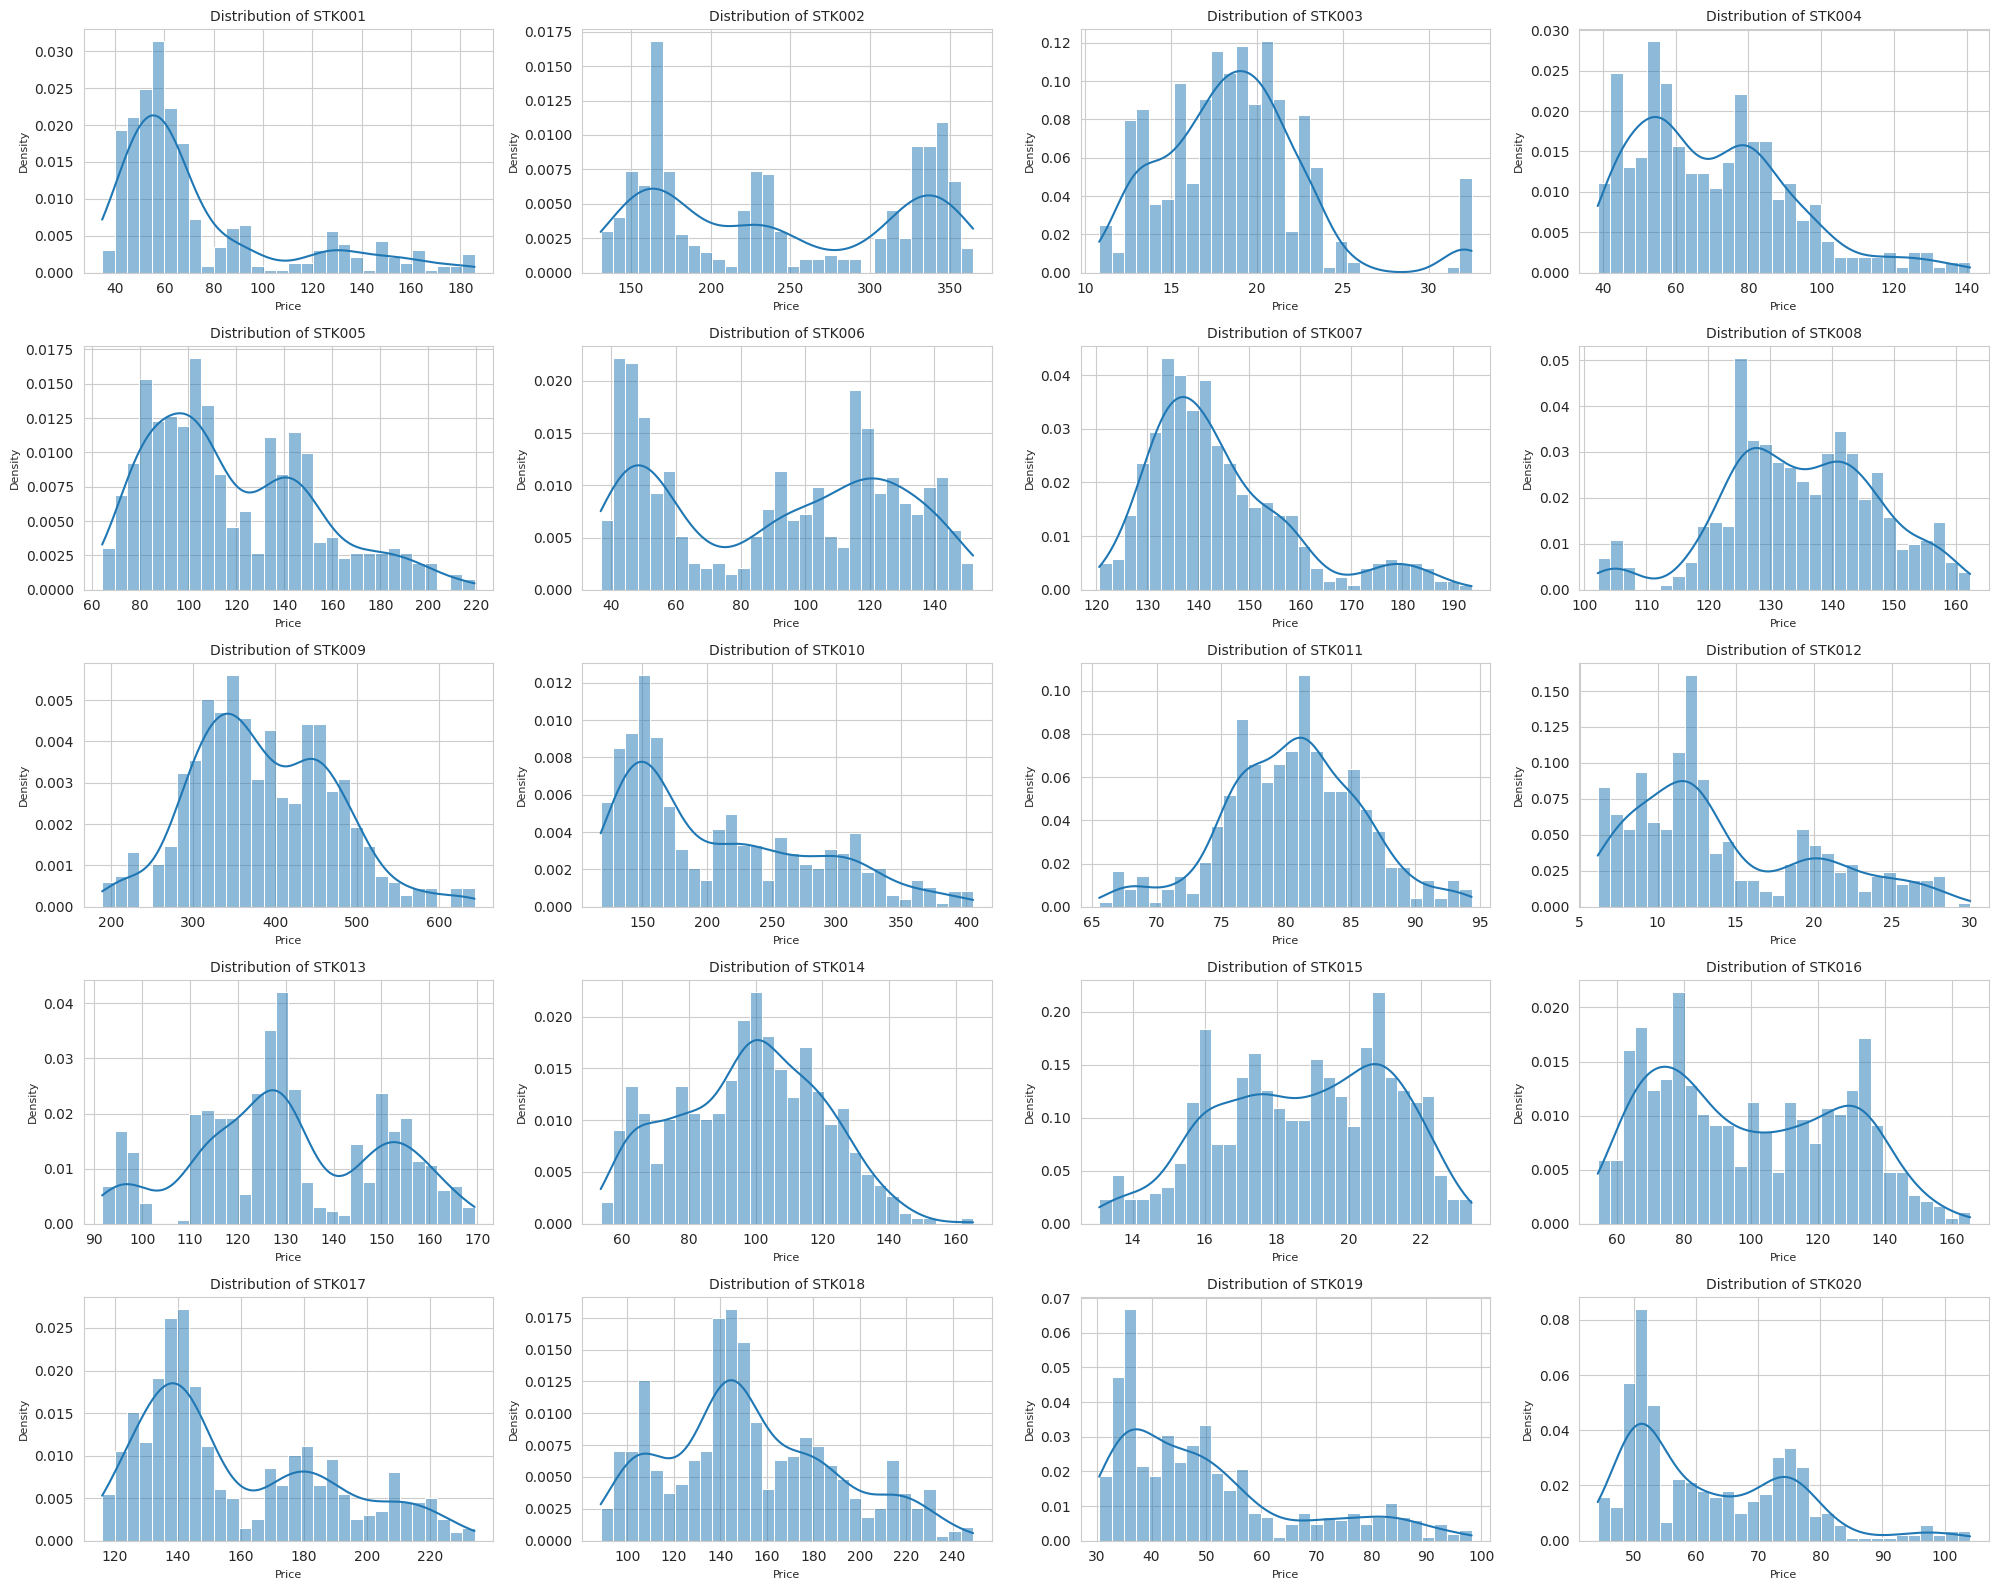

In [88]:
numeric_cols = stock_prices.select_dtypes(include=['float']).columns

plt.figure(figsize=(20, 16))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(stock_prices[col], kde=True,bins=30,stat='density')
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel("Price", fontsize=8)
    plt.ylabel("Density", fontsize=8)
    plt.grid(True)

plt.tight_layout()
plt.show()

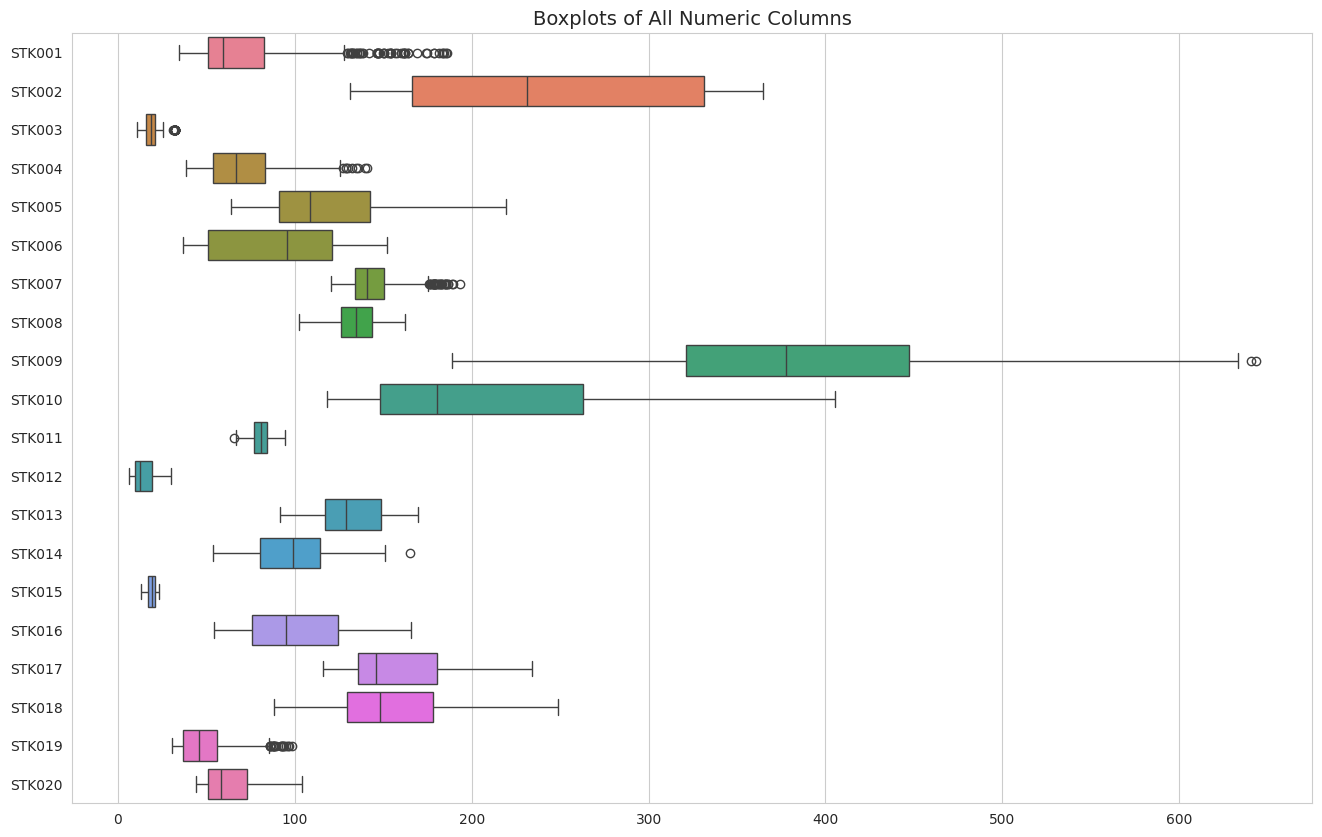

In [89]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=stock_prices[numeric_cols], orient="h")
plt.title("Boxplots of All Numeric Columns", fontsize=14)
plt.show()

Imputation of Missing Data

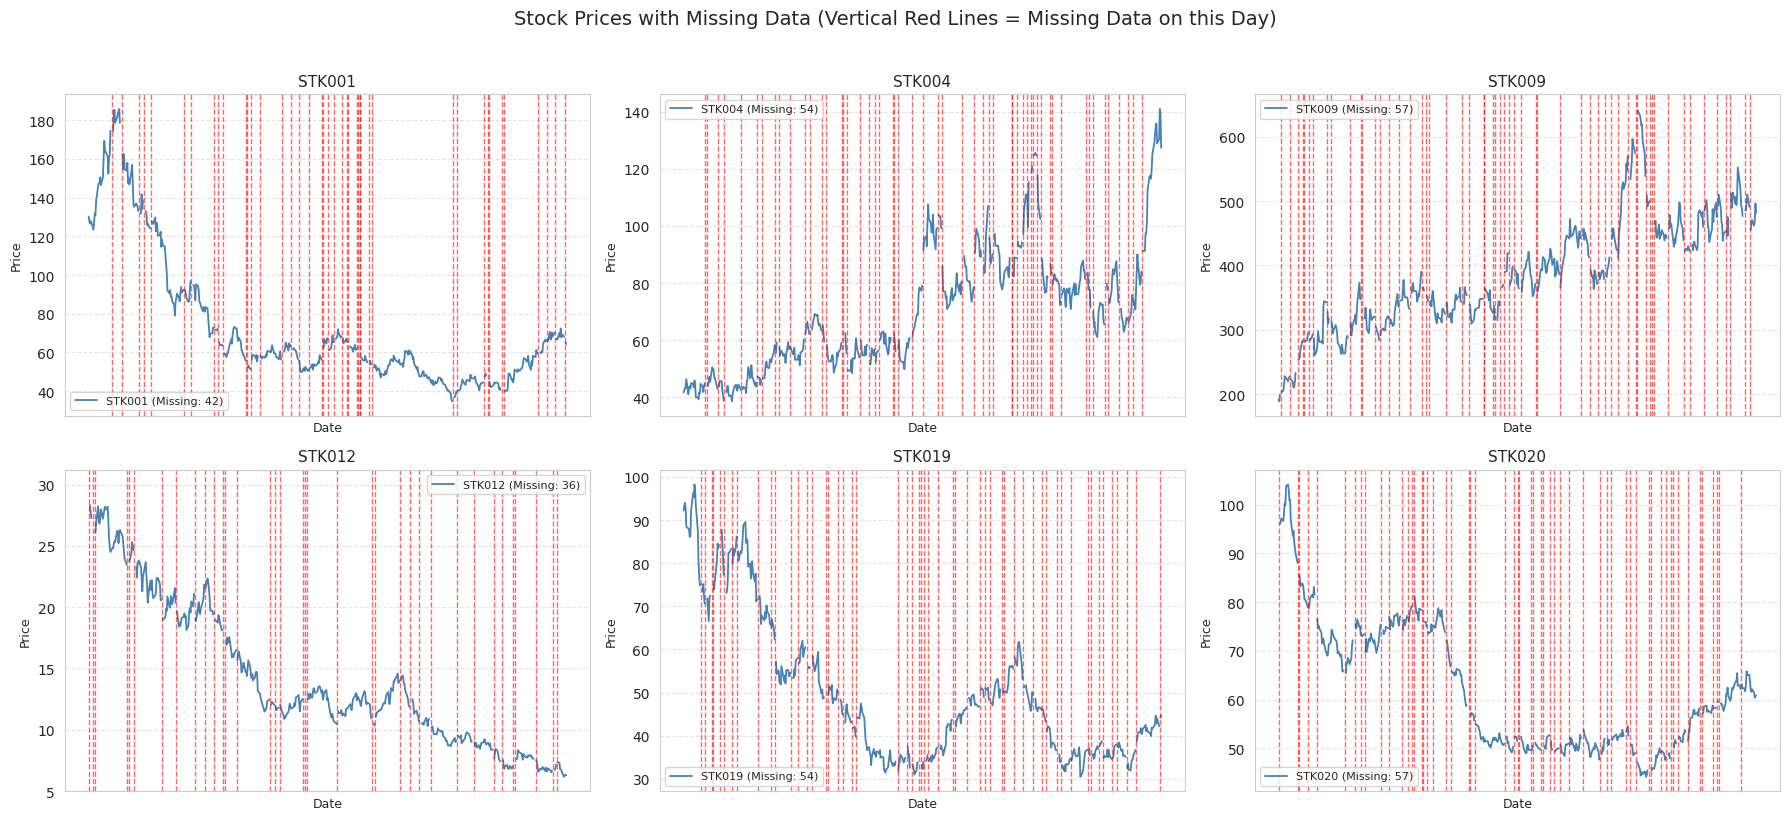

In [90]:
date_col = [c for c in stock_prices.columns if 'date' in c.lower()][0]
stock_prices[date_col] = pd.to_datetime(stock_prices[date_col], errors='coerce')

cols_to_plot = ['STK001', 'STK004', 'STK009', 'STK012', 'STK019', 'STK020']
cols_to_plot = [c for c in cols_to_plot if c in stock_prices.columns]


num_cols = 3
num_rows = int(np.ceil(len(cols_to_plot) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4), sharex=True)
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    ax = axes[i]

    ax.plot(stock_prices[date_col], stock_prices[col], color='steelblue', linewidth=1.3,
            label=f'{col} (Missing: {stock_prices[col].isna().sum()})')


    missing_dates = stock_prices.loc[stock_prices[col].isna(), date_col]


    for md in missing_dates:
        ax.axvline(x=md, color='red', linestyle='--', alpha=0.6, linewidth=1)


    ax.set_title(col, fontsize=11)
    ax.set_ylabel('Price', fontsize=9)
    ax.set_xlabel('Date', fontsize=9)
    ax.set_xticks([])
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=8, loc='best')

fig.suptitle('Stock Prices with Missing Data (Vertical Red Lines = Missing Data on this Day)',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Comparing Interpolation Techniques

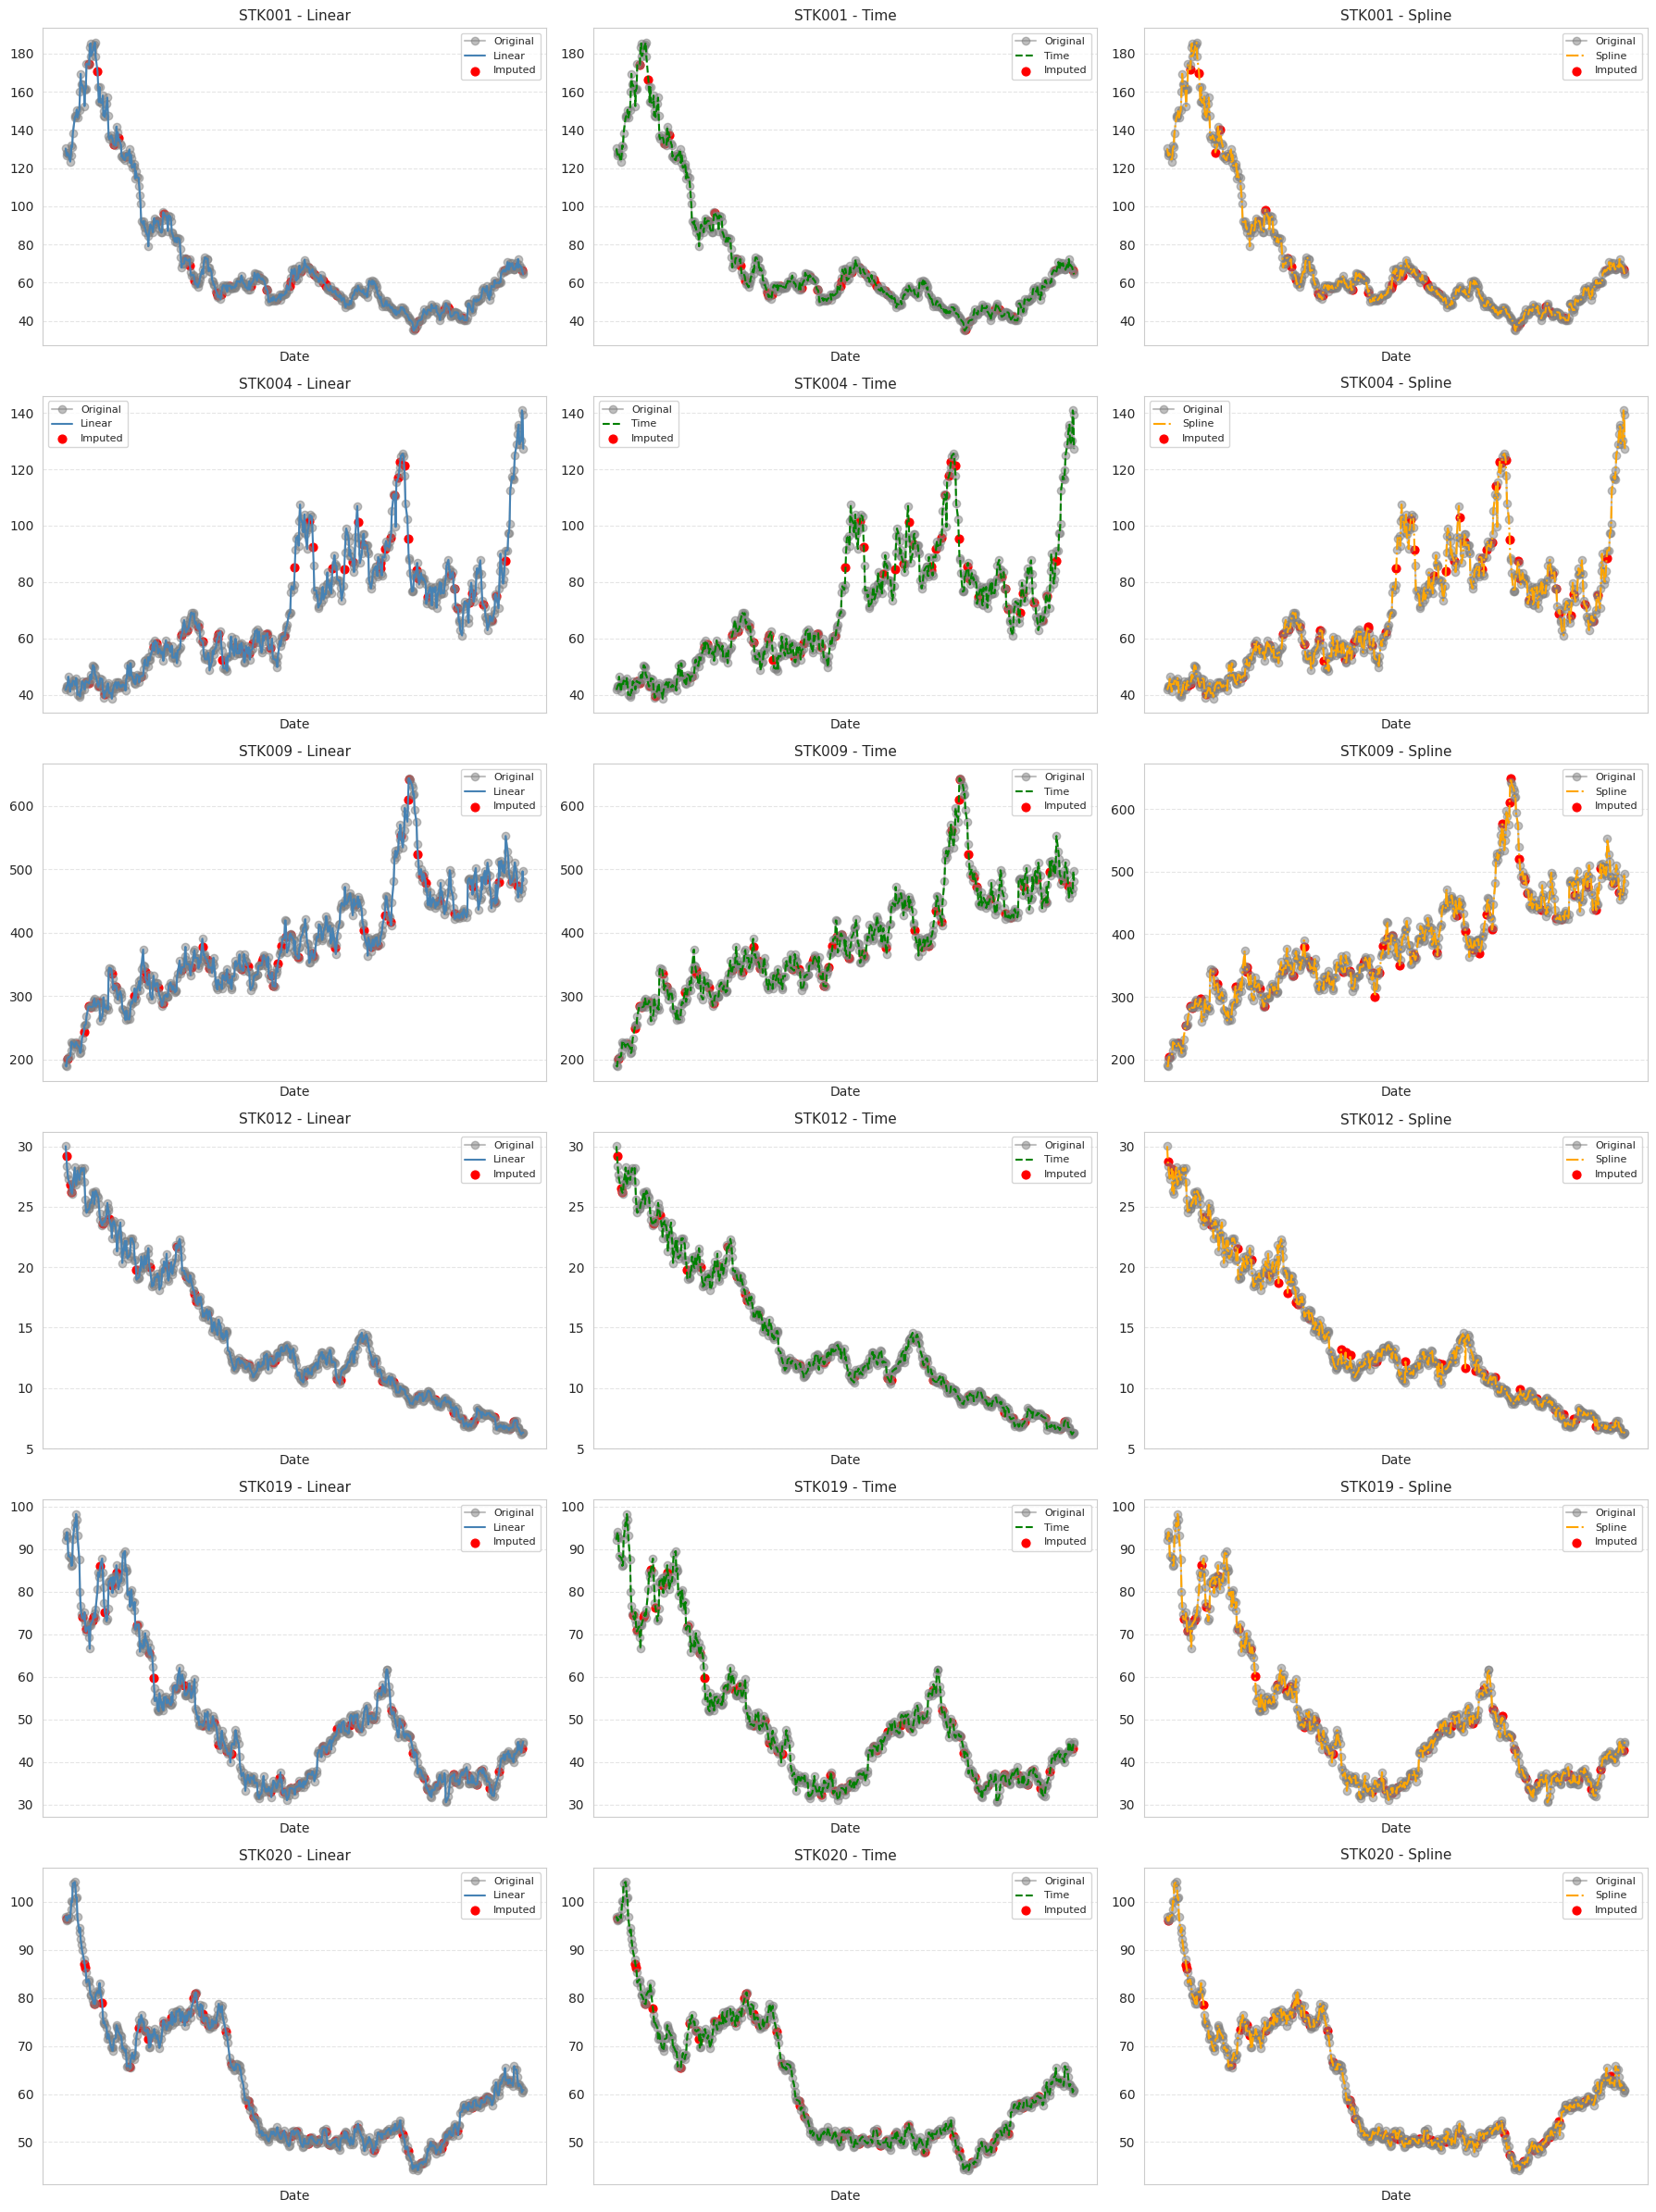

Variance Comparison After Imputation:


,Stock,Missing Count,Var Before,Var After (Linear),Var After (Time),Var After (Spline),ΔVar (%) Linear,ΔVar (%) Time,ΔVar (%) Spline
0,STK001,42,1222.0419,1204.3627,1203.4151,1203.9914,-1.45,-1.52,-1.48
1,STK004,54,458.2248,456.0923,456.1933,458.4295,-0.47,-0.44,0.04
2,STK009,57,7275.0245,7324.6326,7333.1326,7325.4000,0.68,0.80,0.69
3,STK012,36,34.4004,34.8856,34.8939,34.9072,1.41,1.43,1.47
4,STK019,54,273.9754,268.2079,268.2512,268.1600,-2.11,-2.09,-2.12
5,STK020,57,174.0237,173.2841,173.2701,173.0549,-0.42,-0.43,-0.56


Imputed Values for STK001:
              Linear      Time    Spline
Date                                    
2023-02-06  174.3394  174.2467  171.6443
2023-02-20  170.5065  166.4730  169.5399
2023-03-17  132.3835  132.6967  128.2080
2023-03-24  135.8018  137.2396  140.1074
2023-04-04  125.8814  125.8814  126.2231
2023-05-23   92.2892   92.2892   91.9423
2023-06-02   95.8507   96.3543   98.0099
2023-07-06   72.3359   72.3359   72.9513
2023-07-12   68.7815   68.7815   68.1912
2023-07-19   61.3255   61.3255   61.8560
2023-08-22   54.6767   54.6767   54.4089
2023-08-23   53.5494   53.5494   53.6600
2023-08-29   53.7700   53.7700   53.5552
2023-09-11   58.3196   58.3319   57.2049
2023-10-13   58.3876   57.3751   56.0525
2023-10-27   62.7171   63.3073   63.2013
2023-11-07   56.2107   56.2107   55.0387
2023-11-23   51.5849   51.5849   51.4413
2023-12-12   58.3932   58.3932   57.0269
2023-12-13   60.5218   60.5218   58.9920
2023-12-21   64.0703   64.0703   64.1950
2023-12-29   66.1621   65.6991

In [91]:
df_copy = stock_prices.copy()


date_col = [c for c in df_copy.columns if 'date' in c.lower()][0]
df_copy[date_col] = pd.to_datetime(df_copy[date_col], errors='coerce')
df_copy.set_index('date', inplace=True)


cols_to_plot = ['STK001', 'STK004', 'STK009', 'STK012', 'STK019', 'STK020']


n_rows = len(cols_to_plot)
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharex=True)
axes = axes.reshape(n_rows, n_cols)

summary_data = []
imputed_tables = {}


for r, col in enumerate(cols_to_plot):
    if col not in df_copy.columns:
        print(f"Column {col} not found — skipping.")
        continue


    linear_interp = df_copy[col].interpolate(method='linear')
    time_interp = df_copy[col].interpolate(method='time')
    spline_interp = df_copy[col].interpolate(method='spline', order=3)
    missing_idx = df_copy.index[df_copy[col].isnull()]

    # Variance before and after
    var_before = df_copy[col].dropna().var()
    var_linear = linear_interp.var()
    var_time = time_interp.var()
    var_spline = spline_interp.var()

    summary_data.append({
        'Stock': col,
        'Missing Count': len(missing_idx),
        'Var Before': var_before,
        'Var After (Linear)': var_linear,
        'Var After (Time)': var_time,
        'Var After (Spline)': var_spline
    })


    if len(missing_idx) > 0:
        imputed_values = pd.DataFrame({
            'Date': missing_idx,
            'Linear': [linear_interp.loc[i] for i in missing_idx],
            'Time': [time_interp.loc[i] for i in missing_idx],
            'Spline': [spline_interp.loc[i] for i in missing_idx],
        }).set_index('Date')
        imputed_tables[col] = imputed_values

    # --- Linear plot ---
    ax = axes[r, 0]
    ax.plot(df_copy.index, df_copy[col], 'o-', color='gray', alpha=0.5, label='Original')
    ax.plot(df_copy.index, linear_interp, color='steelblue', label='Linear')
    ax.scatter(missing_idx, [linear_interp.loc[i] for i in missing_idx],
               color='red', s=40, label='Imputed')
    ax.set_title(f"{col} - Linear", fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("Date")
    ax.set_xticks([])

    ax.legend(fontsize=8)

    # --- Time plot ---
    ax = axes[r, 1]
    ax.plot(df_copy.index, df_copy[col], 'o-', color='gray', alpha=0.5, label='Original')
    ax.plot(df_copy.index, time_interp, color='green', linestyle='--', label='Time')
    ax.scatter(missing_idx, [time_interp.loc[i] for i in missing_idx],
               color='red', s=40, label='Imputed')
    ax.set_title(f"{col} - Time", fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("Date")
    ax.set_xticks([])
    ax.legend(fontsize=8)

    # --- Spline plot ---
    ax = axes[r, 2]
    ax.plot(df_copy.index, df_copy[col], 'o-', color='gray', alpha=0.5, label='Original')
    ax.plot(df_copy.index, spline_interp, color='orange', linestyle='-.', label='Spline')
    ax.scatter(missing_idx, [spline_interp.loc[i] for i in missing_idx],
               color='red', s=40, label='Imputed')
    ax.set_title(f"{col} - Spline", fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("Date")
    ax.set_xticks([])
    ax.legend(fontsize=8)


plt.tight_layout()
plt.show()


summary_df = pd.DataFrame(summary_data)
for method in ['Linear', 'Time', 'Spline']:
    summary_df[f'ΔVar (%) {method}'] = (
        (summary_df[f'Var After ({method})'] - summary_df['Var Before']) /
        summary_df['Var Before'] * 100
    ).round(2)

print("Variance Comparison After Imputation:")
display(summary_df.round(4))


for col, table in imputed_tables.items():
    print(f"Imputed Values for {col}:")
    print(table.round(4))

Linear Interpolation

In [92]:
stock_prices_copy = stock_prices.copy()


date_cols = [c for c in stock_prices_copy.columns if 'date' in c.lower()]
date_col = date_cols[0]


stock_prices_copy[date_col] = pd.to_datetime(stock_prices_copy[date_col], errors='coerce')


imputed_stock_prices = stock_prices_copy.interpolate(method='linear')


print("Missing values after linear interpolation:")
print(imputed_stock_prices.isnull().sum())


filled_summary = stock_prices_copy.isnull().sum() - imputed_stock_prices.isnull().sum()
print("Number of values imputed per stock:")
print(filled_summary[filled_summary > 0])
display(imputed_stock_prices.head())

Missing values after linear interpolation:
date      0
STK001    0
STK002    0
STK003    0
STK004    0
STK005    0
STK006    0
STK007    0
STK008    0
STK009    0
STK010    0
STK011    0
STK012    0
STK013    0
STK014    0
STK015    0
STK016    0
STK017    0
STK018    0
STK019    0
STK020    0
dtype: int64
Number of values imputed per stock:
STK001    42
STK004    54
STK009    57
STK012    36
STK019    54
STK020    57
dtype: int64


,date,STK001,STK002,STK003,STK004,STK005,STK006,STK007,STK008,STK009,...,STK011,STK012,STK013,STK014,STK015,STK016,STK017,STK018,STK019,STK020
0,2023-01-02,130.215257,143.732847,10.829021,41.721087,145.478750,136.613229,193.549026,154.597180,190.646814,...,66.629920,30.019335,158.546534,132.388352,19.155342,78.409589,191.791965,105.076218,92.218536,96.962925
1,2023-01-03,127.931982,141.811103,10.840378,42.372205,150.451171,131.081439,189.433498,156.245870,188.642260,...,67.403967,29.177773,157.962636,132.316777,19.495879,81.278706,196.519348,105.143629,93.324523,96.498923
2,2023-01-04,126.531338,139.814796,10.824561,43.273956,150.121855,132.287593,185.192571,153.568772,199.054913,...,65.541600,28.336211,157.022235,128.554686,19.489534,79.565899,195.192089,106.084249,93.996184,96.034921
3,2023-01-05,127.837687,140.885311,10.874388,43.307331,154.264000,127.534322,189.023341,155.642891,201.061534,...,66.558603,27.706730,154.660460,120.788272,18.989024,83.375297,193.497711,104.311590,92.687024,96.281810
4,2023-01-06,127.140842,143.103993,11.212466,46.389494,151.434469,125.356736,185.290655,155.942939,203.068155,...,67.339732,27.283299,159.619771,112.131796,18.700643,80.443424,189.787155,109.664184,88.463448,97.103757


Comparisons Before and After Imputation

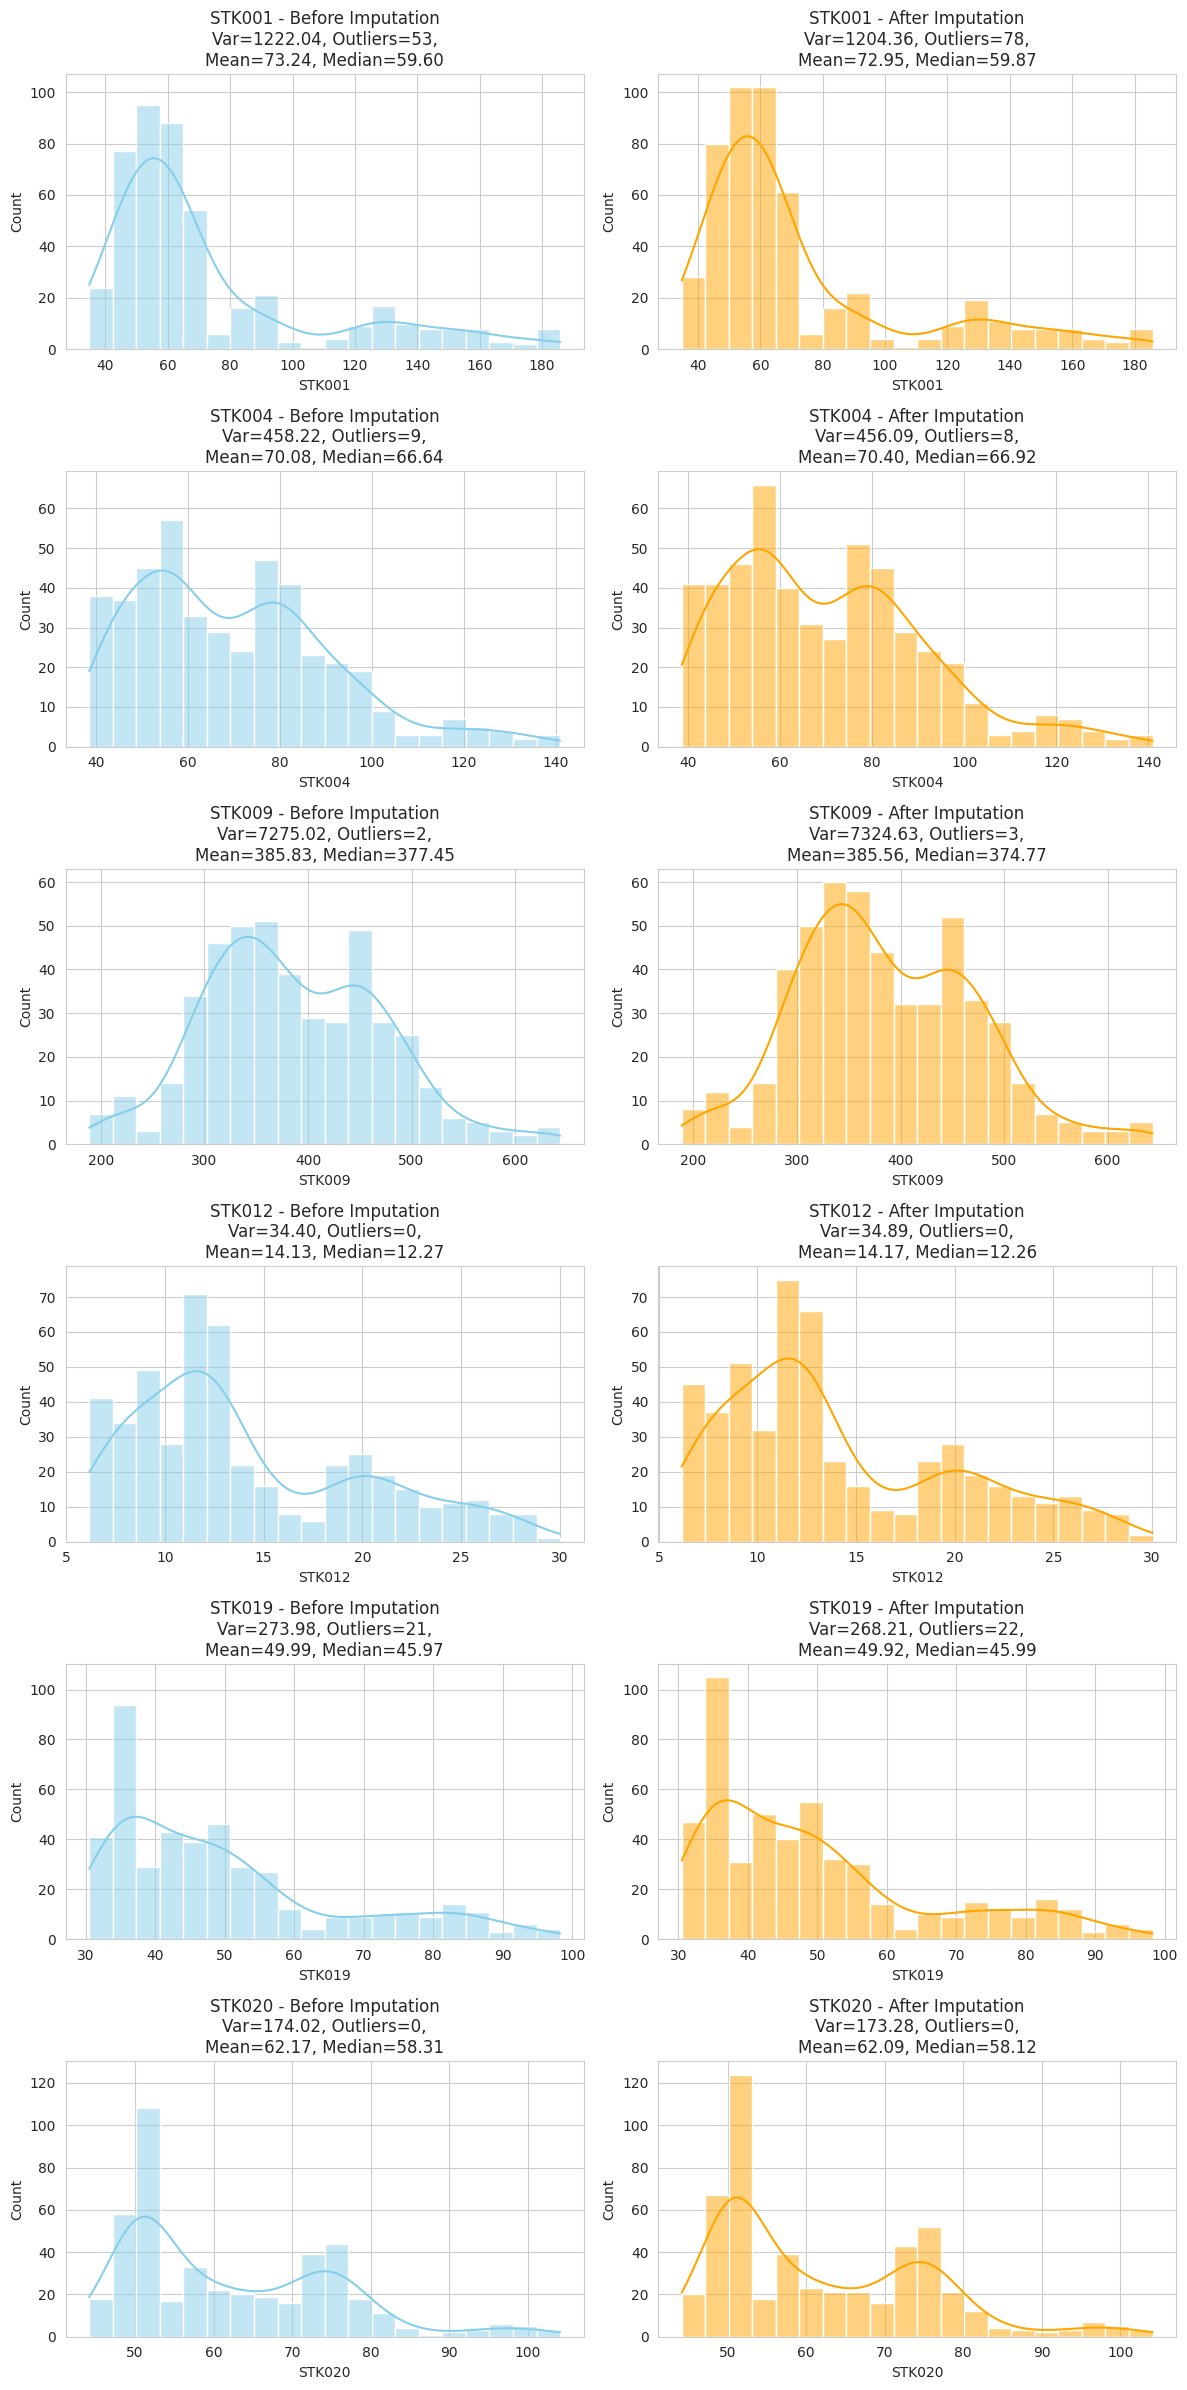

Variance Comparison Before and After Linear Interpolation:


,Stock,Variance Before,Variance After,ΔVar (%)
0,STK001,1222.0419,1204.3627,-1.4467
1,STK004,458.2248,456.0923,-0.4654
2,STK009,7275.0245,7324.6326,0.6819
3,STK012,34.4004,34.8856,1.4106
4,STK019,273.9754,268.2079,-2.1051
5,STK020,174.0237,173.2841,-0.4250


Number of Outliers Before and After Linear Interpolation:


,Stock,Outliers Before,Outliers After
0,STK001,53,78
1,STK004,9,8
2,STK009,2,3
3,STK012,0,0
4,STK019,21,22
5,STK020,0,0


In [93]:
stocks_to_plot = ['STK001', 'STK004', 'STK009', 'STK012', 'STK019', 'STK020']

variance_summary = []
outlier_summary = []

fig, axes = plt.subplots(len(stocks_to_plot), 2, figsize=(12, 4 * len(stocks_to_plot)))

for i, stock in enumerate(stocks_to_plot):

    var_before = stock_prices_copy[stock].var()
    var_after = imputed_stock_prices[stock].var()


    mean_before = stock_prices_copy[stock].mean()
    mean_after = imputed_stock_prices[stock].mean()

    median_before = stock_prices_copy[stock].median()
    median_after = imputed_stock_prices[stock].median()


    def detect_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        outliers = series[(series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)]
        return outliers

    outliers_before = detect_outliers(stock_prices_copy[stock].dropna())
    outliers_after = detect_outliers(imputed_stock_prices[stock])

    variance_summary.append({
        'Stock': stock,
        'Variance Before': var_before,
        'Variance After': var_after,
        'ΔVar (%)': (var_after - var_before) / var_before * 100
    })

    outlier_summary.append({
        'Stock': stock,
        'Outliers Before': len(outliers_before),
        'Outliers After': len(outliers_after)
    })


    hist_before = sns.histplot(stock_prices_copy[stock], kde=True, color='skyblue', bins=20, ax=axes[i, 0])
    hist_after = sns.histplot(imputed_stock_prices[stock], kde=True, color='orange', bins=20, ax=axes[i, 1])


    y_max = max(hist_before.get_ylim()[1], hist_after.get_ylim()[1])
    hist_before.set_ylim(0, y_max)
    hist_after.set_ylim(0, y_max)


    axes[i, 0].set_title(f"{stock} - Before Imputation\nVar={var_before:.2f}, Outliers={len(outliers_before)},\nMean={mean_before:.2f}, Median={median_before:.2f}")
    axes[i, 1].set_title(f"{stock} - After Imputation\nVar={var_after:.2f}, Outliers={len(outliers_after)},\nMean={mean_after:.2f}, Median={median_after:.2f}")

plt.tight_layout()
plt.show()


variance_df = pd.DataFrame(variance_summary)
outlier_df = pd.DataFrame(outlier_summary)

print("Variance Comparison Before and After Linear Interpolation:")
display(variance_df.round(4))

print("Number of Outliers Before and After Linear Interpolation:")
display(outlier_df)

In [94]:
imputed_stock_prices.to_csv('./stocks_imputed.csv',index=False)

Outliers Detection

In [95]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)]
    return outliers, lower, upper

Outliers After Imputation

In [96]:
outlier_summary = {}


for col in imputed_stock_prices.select_dtypes(include=['float']).columns:
    outliers, lower, upper = detect_outliers(imputed_stock_prices[col])
    count = len(outliers)
    percent = count / len(imputed_stock_prices) * 100

    outlier_summary[col] = {'Count': count, 'Percentage': percent, 'Outliers Below': lower, 'Outliers Above' : upper}


outlier_df = pd.DataFrame(outlier_summary).T
display(outlier_df)

,Count,Percentage,Outliers Below,Outliers Above
STK001,78.0,15.476190,11.538097,117.637940
STK002,0.0,0.000000,-81.335497,578.810882
STK003,19.0,3.769841,8.114279,28.435752
STK004,8.0,1.587302,9.547201,127.692293
STK005,0.0,0.000000,14.106883,219.688046
STK006,0.0,0.000000,-53.858103,226.132599
STK007,32.0,6.349206,109.483598,175.401446
STK008,0.0,0.000000,99.978582,169.646921
STK009,3.0,0.595238,136.398315,633.728251
STK010,0.0,0.000000,-23.466446,434.631635


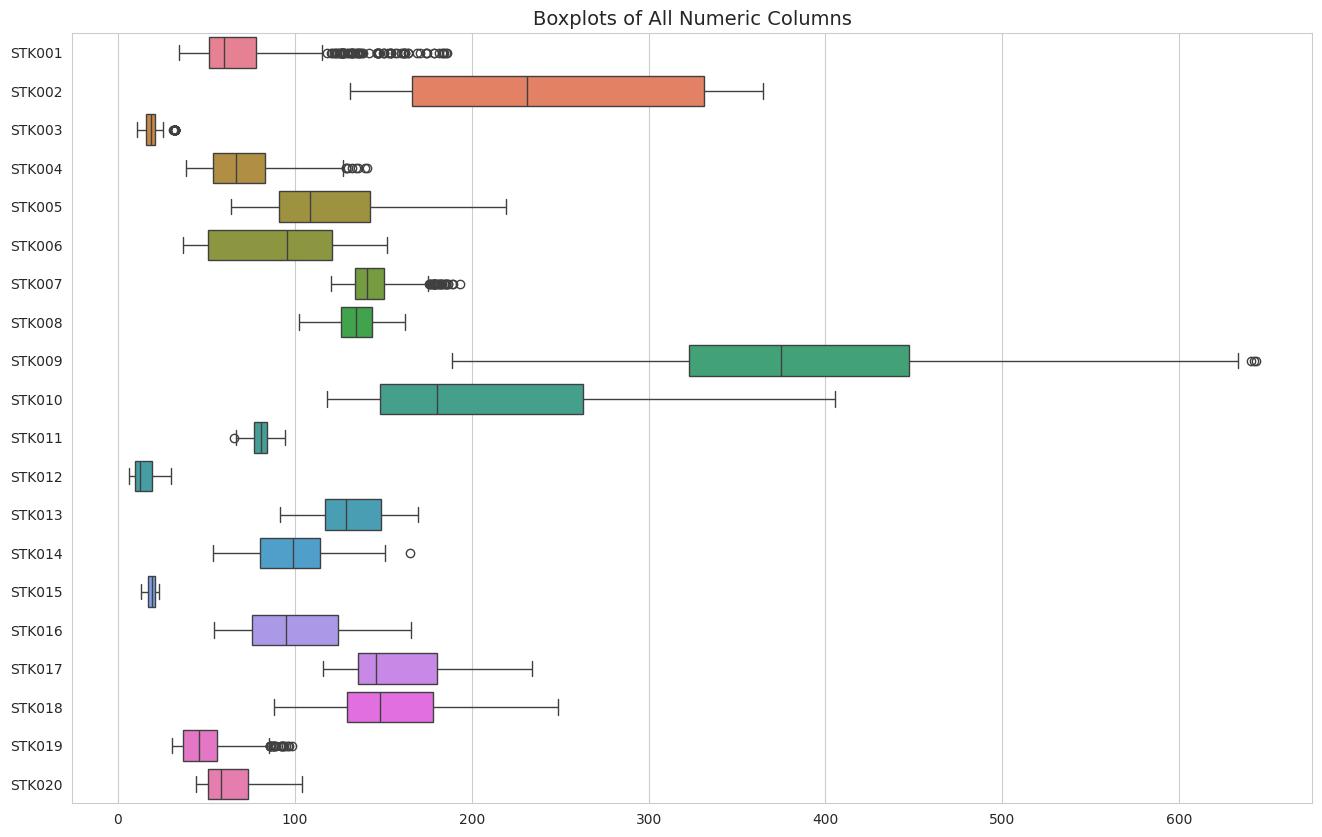

In [97]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=imputed_stock_prices[numeric_cols], orient="h")
plt.title("Boxplots of All Numeric Columns", fontsize=14)
plt.show()

Outliers Handling for STK001: Capping

In [98]:
capped_stock_prices = imputed_stock_prices.copy()
stock = 'STK001'

Q1 = capped_stock_prices[stock].quantile(0.25)
Q3 = capped_stock_prices[stock].quantile(0.75)
IQR = Q3 - Q1

lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

print(f"STK001 IQR capping limits\nlower: {lower_cap}, upper: {upper_cap}")

STK001 IQR capping limits
lower: 11.538097369949618, upper: 117.63793970892523


In [99]:
capped_stock_prices[f'{stock}'] = np.where(
    capped_stock_prices[stock] > upper_cap, upper_cap,
    np.where(capped_stock_prices[stock] < lower_cap, lower_cap, capped_stock_prices[stock])
)

In [100]:
outlier_summary = {}

for col in capped_stock_prices.select_dtypes(include=['float']).columns:
    outliers, lower, upper = detect_outliers(capped_stock_prices[col])
    count = len(outliers)
    percent = count / len(capped_stock_prices) * 100

    outlier_summary[col] = {'Count': count, 'Percentage': percent, 'Outliers Below': lower, 'Outliers Above': upper}

outlier_df = pd.DataFrame(outlier_summary).T
display(outlier_df)

,Count,Percentage,Outliers Below,Outliers Above
STK001,0.0,0.000000,11.538097,117.637940
STK002,0.0,0.000000,-81.335497,578.810882
STK003,19.0,3.769841,8.114279,28.435752
STK004,8.0,1.587302,9.547201,127.692293
STK005,0.0,0.000000,14.106883,219.688046
STK006,0.0,0.000000,-53.858103,226.132599
STK007,32.0,6.349206,109.483598,175.401446
STK008,0.0,0.000000,99.978582,169.646921
STK009,3.0,0.595238,136.398315,633.728251
STK010,0.0,0.000000,-23.466446,434.631635


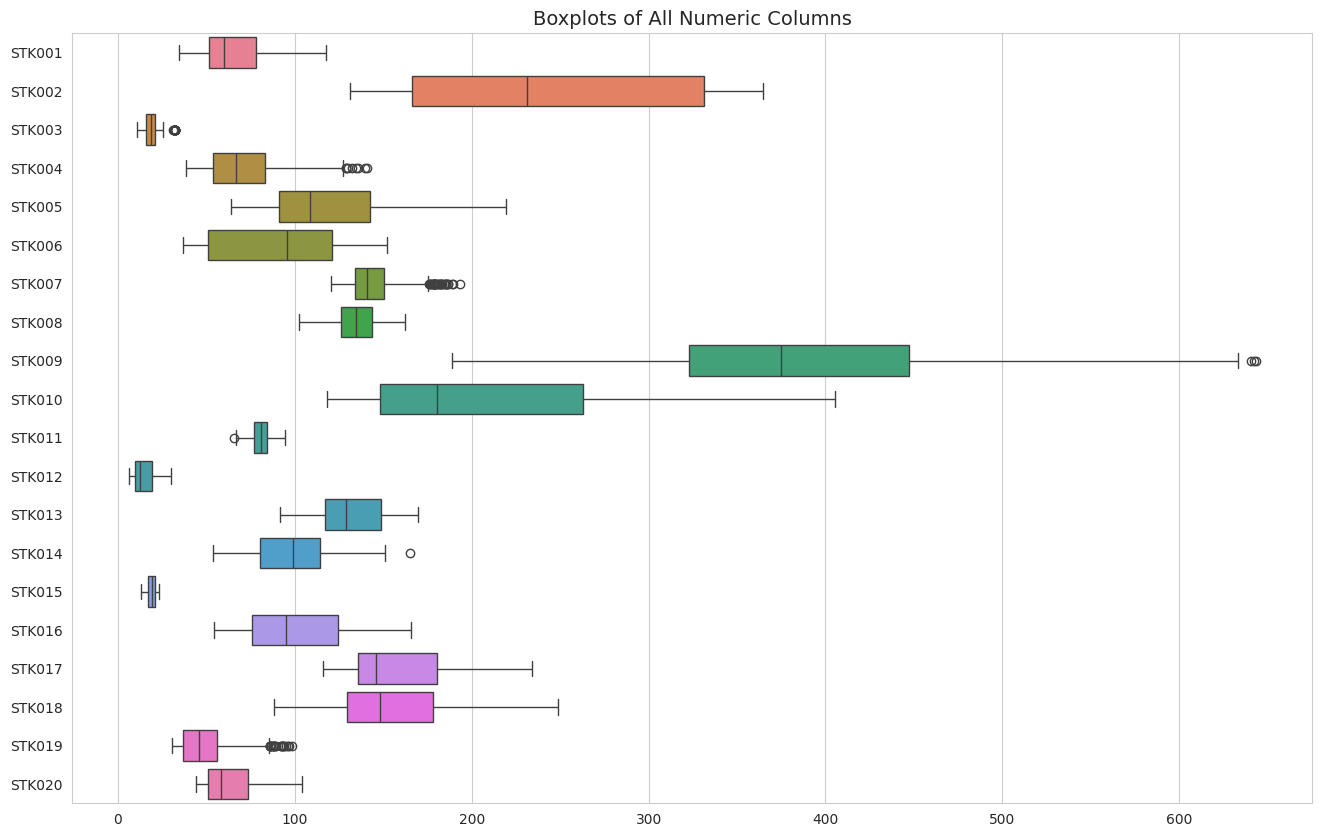

In [101]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=capped_stock_prices[numeric_cols], orient="h")
plt.title("Boxplots of All Numeric Columns", fontsize=14)
plt.show()

Comparison Before and After Outlier Handling

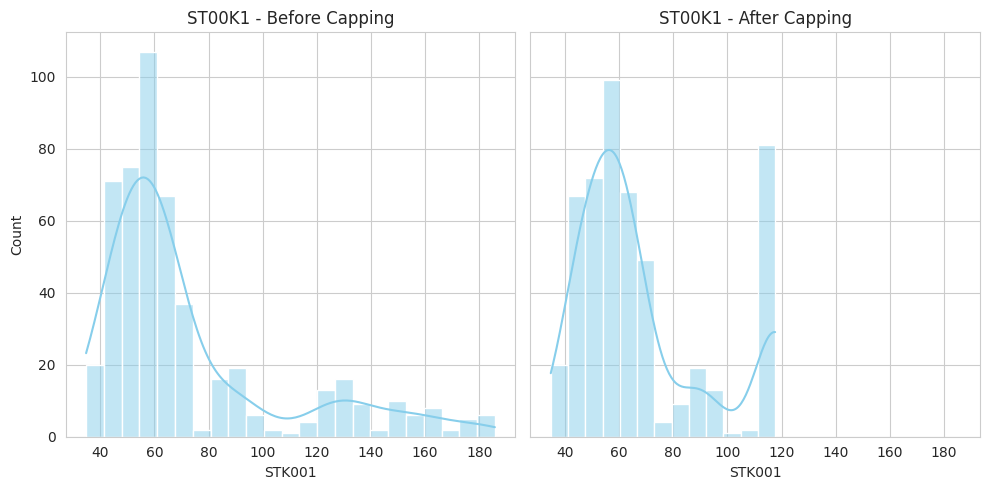

In [102]:
stock='STK001'
imputed_stock_prices_copy = imputed_stock_prices.copy()
capped_stock_prices_copy = capped_stock_prices.copy()

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

hist_before = sns.histplot(imputed_stock_prices[stock], kde=True, color='skyblue', ax=axes[0])
hist_after = sns.histplot(capped_stock_prices_copy[stock], kde=True, color='skyblue', ax=axes[1])


axes[0].set_title(f"ST00K1 - Before Capping")
axes[1].set_title(f"ST00K1 - After Capping")

plt.tight_layout()
plt.show()

In [103]:
capped_stock_prices.to_csv('./stocks_clean.csv',index=False)

In [104]:
capped_stock_prices.head()

,date,STK001,STK002,STK003,STK004,STK005,STK006,STK007,STK008,STK009,...,STK011,STK012,STK013,STK014,STK015,STK016,STK017,STK018,STK019,STK020
0,2023-01-02,117.63794,143.732847,10.829021,41.721087,145.478750,136.613229,193.549026,154.597180,190.646814,...,66.629920,30.019335,158.546534,132.388352,19.155342,78.409589,191.791965,105.076218,92.218536,96.962925
1,2023-01-03,117.63794,141.811103,10.840378,42.372205,150.451171,131.081439,189.433498,156.245870,188.642260,...,67.403967,29.177773,157.962636,132.316777,19.495879,81.278706,196.519348,105.143629,93.324523,96.498923
2,2023-01-04,117.63794,139.814796,10.824561,43.273956,150.121855,132.287593,185.192571,153.568772,199.054913,...,65.541600,28.336211,157.022235,128.554686,19.489534,79.565899,195.192089,106.084249,93.996184,96.034921
3,2023-01-05,117.63794,140.885311,10.874388,43.307331,154.264000,127.534322,189.023341,155.642891,201.061534,...,66.558603,27.706730,154.660460,120.788272,18.989024,83.375297,193.497711,104.311590,92.687024,96.281810
4,2023-01-06,117.63794,143.103993,11.212466,46.389494,151.434469,125.356736,185.290655,155.942939,203.068155,...,67.339732,27.283299,159.619771,112.131796,18.700643,80.443424,189.787155,109.664184,88.463448,97.103757


# Trades Data Set

In [105]:
trades.head()

,transaction_id,timestamp,customer_id,stock_ticker,transaction_type,quantity,average_trade_size,cumulative_portfolio_value
0,1,2023-01-02,4747,STK002,BUY,15,15.00,2155.99
1,2,2023-01-02,4747,STK004,BUY,68,41.50,4993.03
2,3,2023-01-02,227,STK006,BUY,49,49.00,6694.05
3,4,2023-01-02,4747,STK006,BUY,503,195.33,73709.48
4,5,2023-01-02,3938,STK006,BUY,203,203.00,27732.49


In [106]:
trades.columns

Index(['transaction_id', 'timestamp', 'customer_id', 'stock_ticker',
       'transaction_type', 'quantity', 'average_trade_size',
       'cumulative_portfolio_value'],
      dtype='object')

In [107]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   transaction_id              10000 non-null  int64  
 1   timestamp                   10000 non-null  object 
 2   customer_id                 10000 non-null  int64  
 3   stock_ticker                10000 non-null  object 
 4   transaction_type            10000 non-null  object 
 5   quantity                    10000 non-null  int64  
 6   average_trade_size          10000 non-null  float64
 7   cumulative_portfolio_value  10000 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 625.1+ KB


In [108]:
trades.skew(numeric_only=True)

,0
transaction_id,0.000000
customer_id,-0.475378
quantity,5.034731
average_trade_size,7.764044
cumulative_portfolio_value,1.759289


In [109]:
trades.describe()

,transaction_id,customer_id,quantity,average_trade_size,cumulative_portfolio_value
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,3076.642900,210.599900,214.254502,1.740485e+06
std,2886.89568,1681.888717,287.791831,154.797352,2.369622e+06
min,1.00000,4.000000,1.000000,8.000000,0.000000e+00
25%,2500.75000,1513.000000,61.000000,176.270000,9.112538e+04
50%,5000.50000,3588.000000,123.000000,201.730000,7.727134e+05
75%,7500.25000,4747.000000,249.000000,212.632500,2.191020e+06
max,10000.00000,4998.000000,5000.000000,3401.000000,9.914939e+06


In [141]:
trades.skew(numeric_only=True)

,0
transaction_id,0.000000
customer_id,-0.475378
quantity,5.034731
average_trade_size,7.764044
cumulative_portfolio_value,1.759289


Checking for Duplicates

In [110]:
trades.duplicated().sum()

np.int64(0)

Detecting for Missing Data

In [111]:
sum_null = trades.isnull().sum()
perc_null_mean = trades.isnull().mean()*100
print(sum_null)
print('-'*40)
perc_null_mean

transaction_id                0
timestamp                     0
customer_id                   0
stock_ticker                  0
transaction_type              0
quantity                      0
average_trade_size            0
cumulative_portfolio_value    0
dtype: int64
----------------------------------------


,0
transaction_id,0.0
timestamp,0.0
customer_id,0.0
stock_ticker,0.0
transaction_type,0.0
quantity,0.0
average_trade_size,0.0
cumulative_portfolio_value,0.0


Cumulative Portfolio Value

<Axes: xlabel='cumulative_portfolio_value', ylabel='Count'>

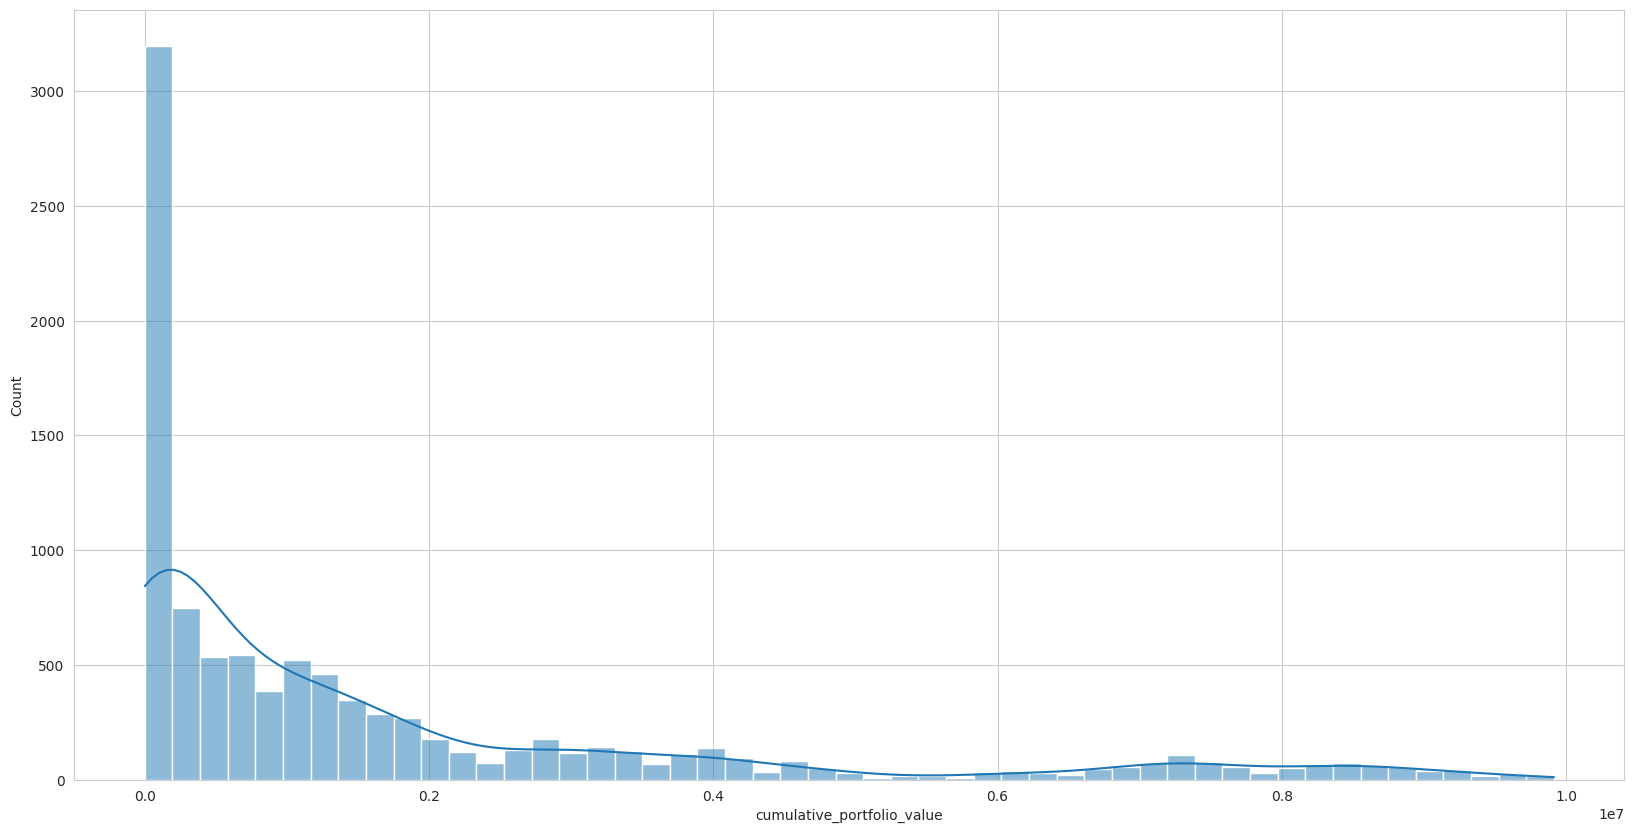

In [112]:
fig1 = plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.histplot(trades['cumulative_portfolio_value'], kde=True)

<Axes: >

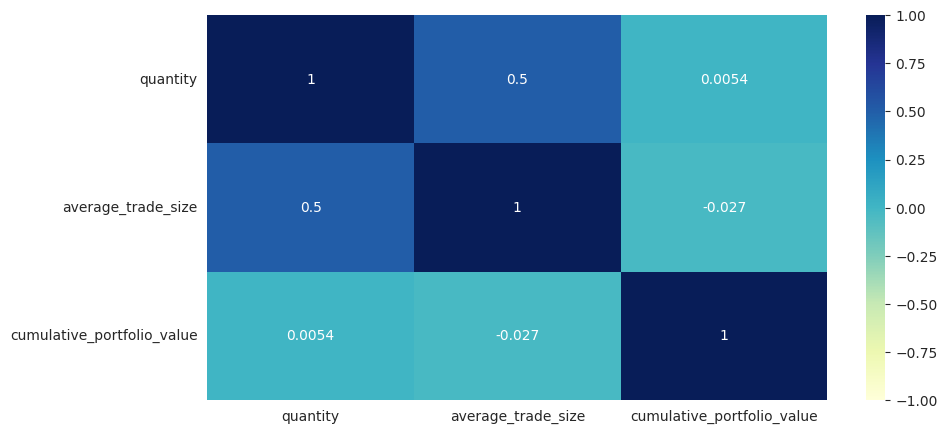

In [113]:
plt.figure(figsize=(10,5))
genre_heatmap = trades[['quantity', 'average_trade_size', 'cumulative_portfolio_value']].corr()
sns.heatmap(genre_heatmap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

Outliers Detection

In [114]:
Q1 = trades['cumulative_portfolio_value'].quantile(0.25)
Q3 = trades['cumulative_portfolio_value'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

Q1: 91125.380, Q3: 2191019.875, IQR: 2099894.495


In [115]:
print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

Outliers below: -3058716.363
Outliers above: 5340861.617


In [116]:
outliers, upper, lower = detect_outliers(trades['cumulative_portfolio_value'])
print(f'Percentage of Outliers: {len(outliers)/len(trades)*100:.3f}%')
outliers

Percentage of Outliers: 10.370%


,cumulative_portfolio_value
4686,6055746.00
4693,6025168.08
4694,6026200.86
4699,6023522.23
4703,5992939.59
...,...
9971,6283149.38
9981,8802163.09
9989,8801917.68
9991,8798206.20


<Axes: xlabel='cumulative_portfolio_value'>

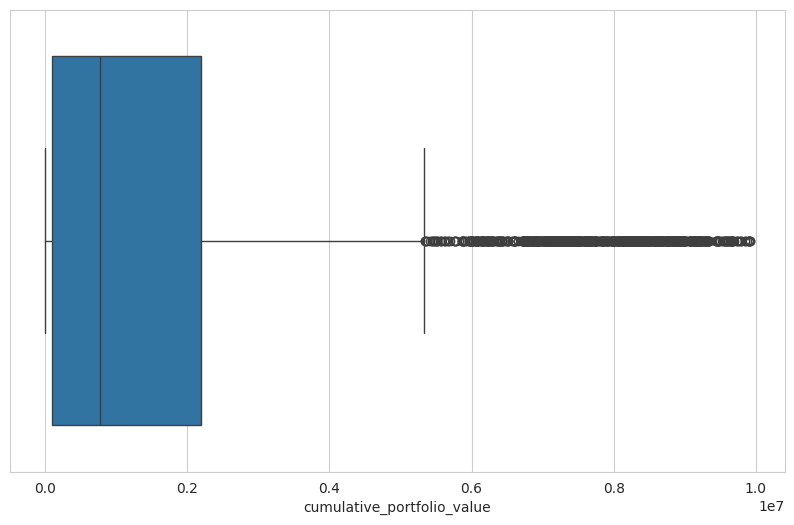

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=trades['cumulative_portfolio_value'])

Outlier Handling: Capping

In [118]:
Q1= trades['cumulative_portfolio_value'].quantile(0.25)
Q3= trades['cumulative_portfolio_value'].quantile(0.75)
IQR = trades['cumulative_portfolio_value'].quantile(0.75) - trades['cumulative_portfolio_value'].quantile(0.25)


max_iqr = Q3 + 1.5*IQR
min_iqr = Q1 - 1.5*IQR

q95 = trades['cumulative_portfolio_value'].quantile(0.95)
q05 = trades['cumulative_portfolio_value'].quantile(0.05)

print(f'min value: {trades['cumulative_portfolio_value'] .min()}')
print(f'max value: {trades['cumulative_portfolio_value'] .max()}')

max_iqr, q95, min_iqr, q05
print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

min value: 0.0
max value: 9914939.17
Q1: 91125.380, Q3: 2191019.875, IQR: 2099894.495


In [119]:
trades_clean = trades.copy()

In [120]:
up_cap = max_iqr
trades_clean['cumulative_portfolio_value'] = np.where(trades_clean['cumulative_portfolio_value'] > up_cap, up_cap, trades_clean['cumulative_portfolio_value'])

In [121]:
down_cap = min_iqr
trades_clean['cumulative_portfolio_value'] = np.where(trades_clean['cumulative_portfolio_value'] < down_cap, down_cap, trades_clean['cumulative_portfolio_value'])

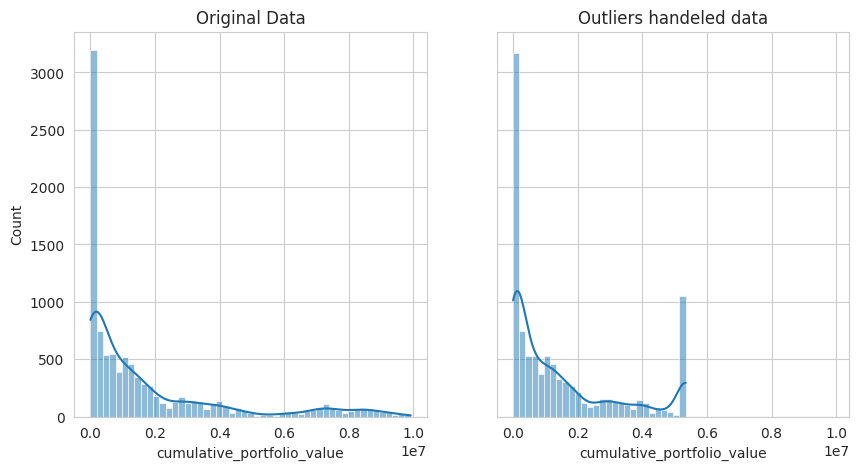

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

sns.histplot(trades['cumulative_portfolio_value'],ax=ax[0], kde=True);
ax[0].set_title('Original Data');

sns.histplot(trades_clean['cumulative_portfolio_value'], ax=ax[1], kde=True);
ax[1].set_title('Outliers handeled data');

In [123]:
Q1 = trades_clean['cumulative_portfolio_value'].quantile(0.25)
Q3 = trades_clean['cumulative_portfolio_value'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

Q1: 91125.380, Q3: 2191019.875, IQR: 2099894.495


In [124]:
outliers, upper, lower = detect_outliers(trades_clean['cumulative_portfolio_value'])
print(f'Percentage of Outliers: {len(outliers)/len(trades)*100:.3f}%')
outliers

Percentage of Outliers: 0.000%


,cumulative_portfolio_value


Average Trade Size

<Axes: xlabel='average_trade_size', ylabel='Count'>

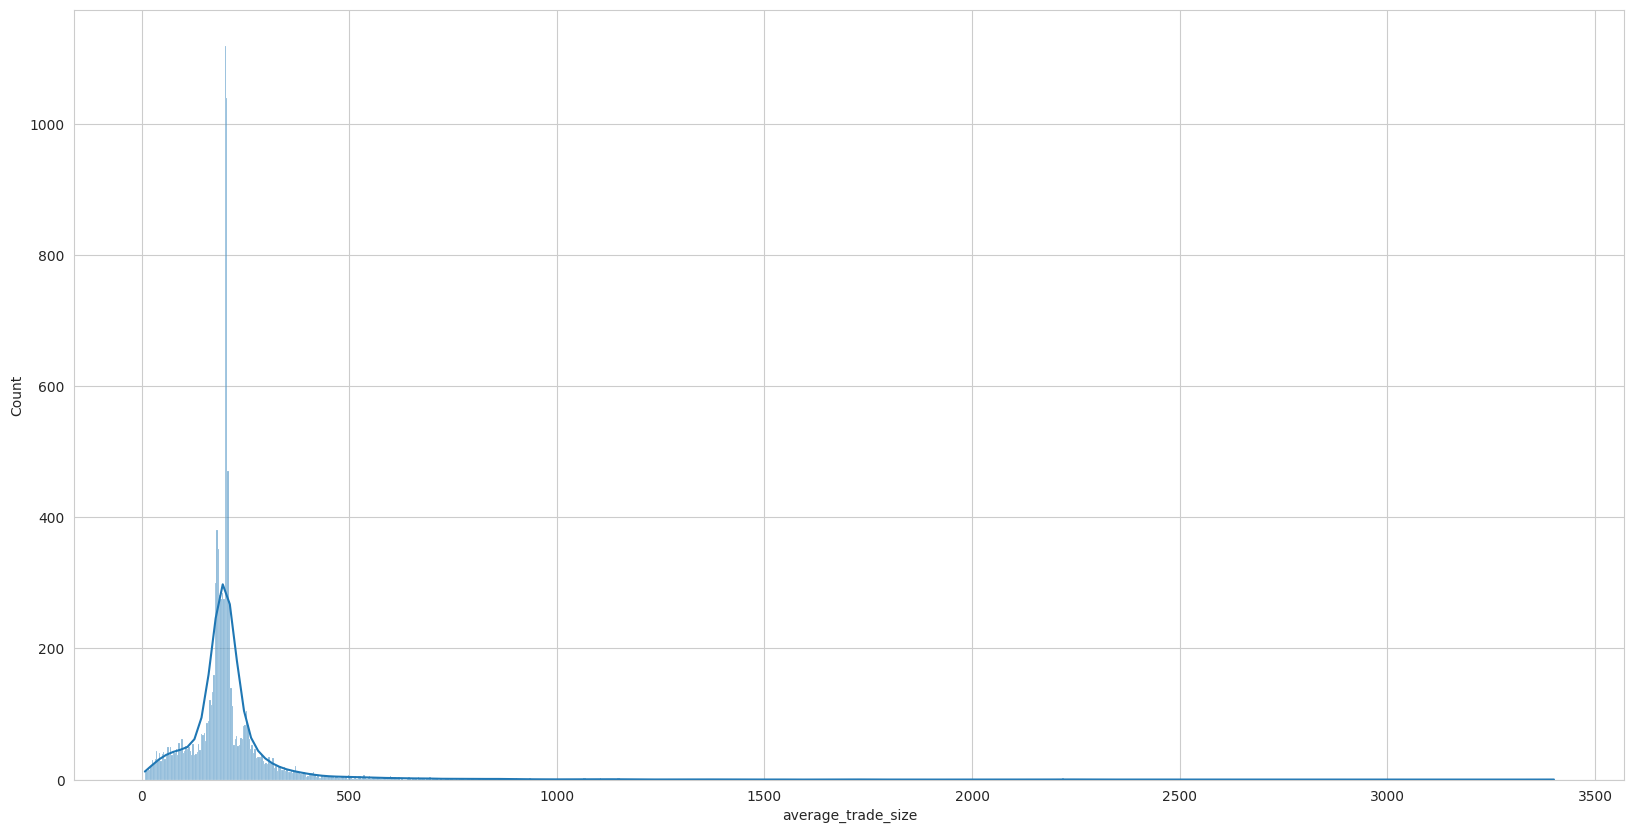

In [125]:
fig2 = plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.histplot(trades['average_trade_size'], kde=True)

Detecting Outliers

In [126]:
Q1 = trades['average_trade_size'].quantile(0.25)
Q3 = trades['average_trade_size'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

Q1: 176.270, Q3: 212.632, IQR: 36.362


In [127]:
print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

Outliers below: 121.726
Outliers above: 267.176


In [128]:
outliers, upper, lower = detect_outliers(trades_clean['average_trade_size'])
print(f'Percentage of Outliers: {len(outliers)/len(trades)*100:.3f}%')
outliers

Percentage of Outliers: 25.250%


,average_trade_size
0,15.00
1,41.50
2,49.00
5,114.00
6,119.00
...,...
9977,323.37
9988,61.50
9990,120.00
9996,47.00


<Axes: xlabel='average_trade_size'>

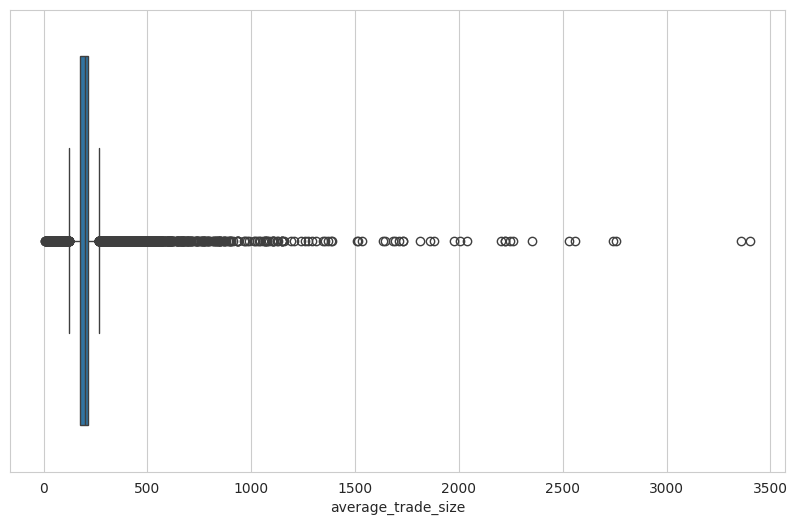

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=trades['average_trade_size'])

Handling Outliers: Capping

In [130]:
Q1, Q3, IQR = trades['average_trade_size'] .quantile(0.25), trades['average_trade_size'].quantile(0.75) , trades['average_trade_size'].quantile(0.75)  - trades['average_trade_size'] .quantile(0.25)


max_iqr = Q3 + 1.5*IQR
min_iqr = Q1 - 1.5*IQR

q95 = trades['average_trade_size'] .quantile(0.95)
q05 = trades['average_trade_size'] .quantile(0.05)

print(f'min value: {trades['average_trade_size'] .min()}')
print(f'max value: {trades['average_trade_size'] .max()}')

max_iqr, q95, min_iqr, q05

min value: 8.0
max value: 3401.0


(np.float64(267.17625),
 np.float64(380.3519999999997),
 np.float64(121.72625000000004),
 np.float64(65.0))

In [131]:
up_cap = max_iqr
trades_clean['average_trade_size'] = np.where(trades_clean['average_trade_size'] > up_cap, up_cap, trades_clean['average_trade_size'])


In [132]:
down_cap = min_iqr
trades_clean['average_trade_size'] = np.where(trades_clean['average_trade_size'] < down_cap, down_cap, trades_clean['average_trade_size'])

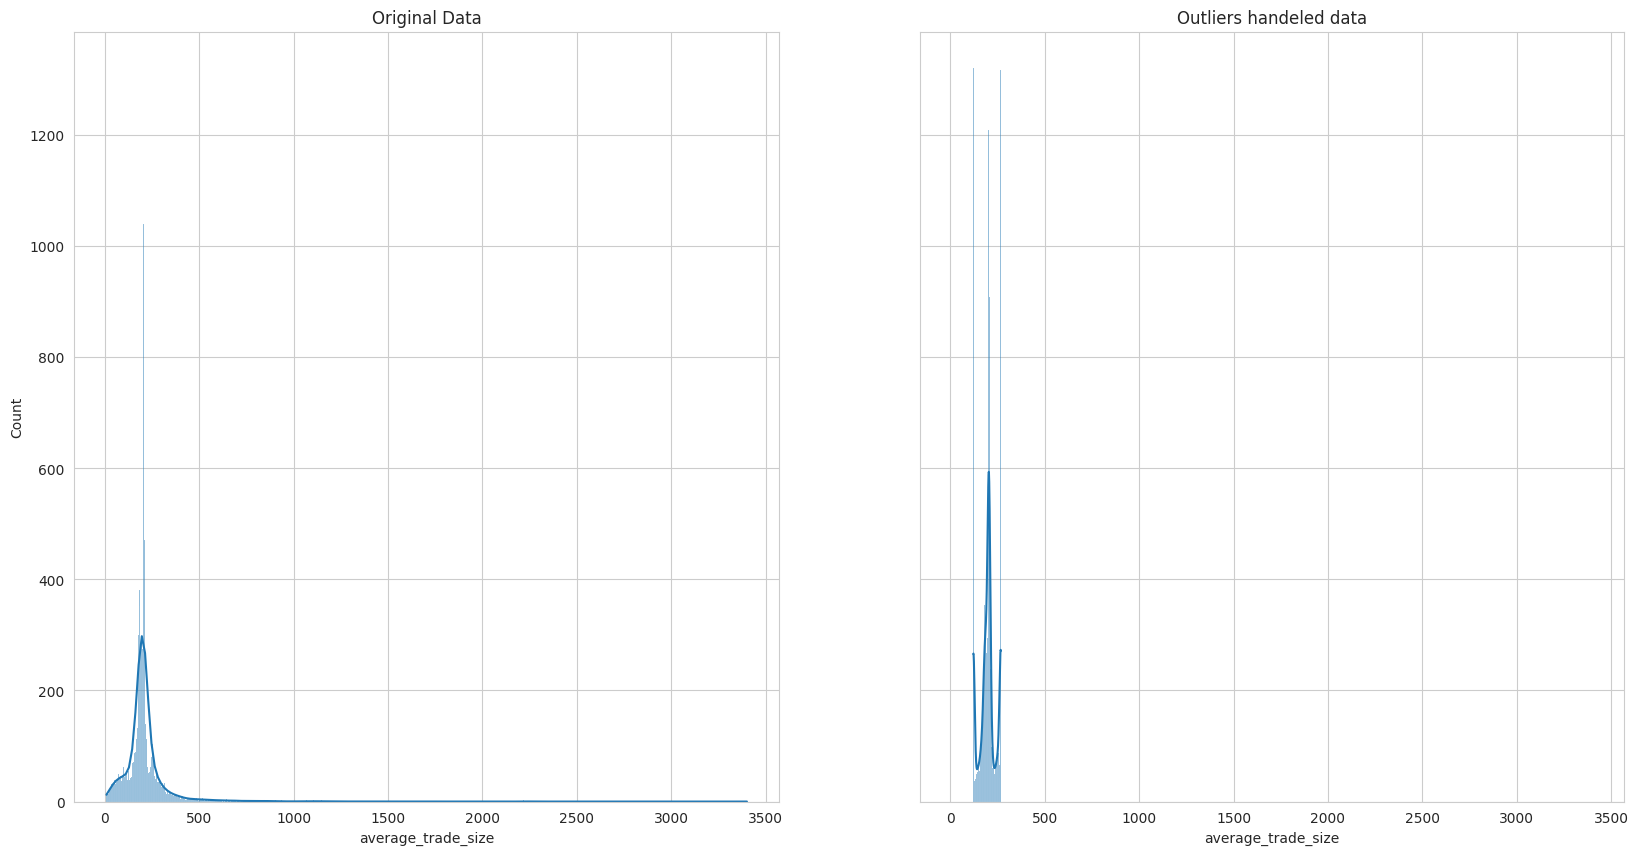

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)


sns.histplot(trades['average_trade_size'],ax=ax[0], kde=True);
ax[0].set_title('Original Data');

sns.histplot(trades_clean['average_trade_size'], ax=ax[1], kde=True);
ax[1].set_title('Outliers handeled data');

In [139]:
Q1 = trades_clean['average_trade_size'].quantile(0.25)
Q3 = trades_clean['average_trade_size'].quantile(0.75)
IQR = Q3 - Q1

In [140]:
outliers, upper, lower = detect_outliers(trades_clean['average_trade_size'])
print(f'Percentage of Outliers: {len(outliers)/len(trades)*100:.3f}%')
outliers

Percentage of Outliers: 0.000%


,average_trade_size


Quantity

<Axes: xlabel='quantity', ylabel='Count'>

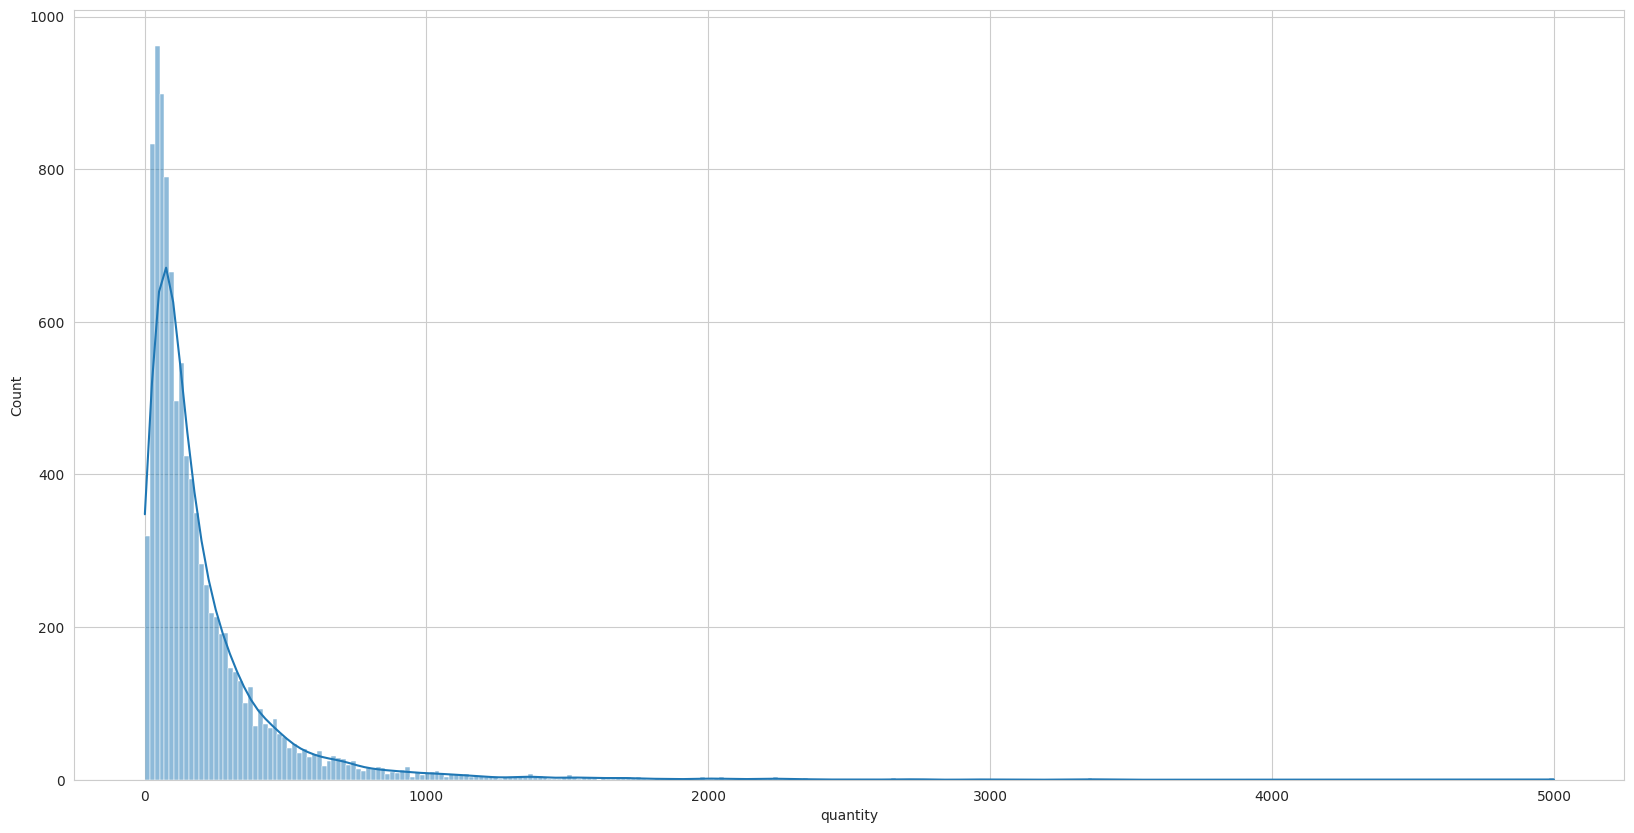

In [142]:
fig1 = plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.histplot(trades['quantity'], kde=True)

Outliers Detection

In [143]:
Q1 = trades['quantity'].quantile(0.25)
Q3 = trades['quantity'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

Q1: 61.000, Q3: 249.000, IQR: 188.000


In [145]:
print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

Outliers below: -221.000
Outliers above: 531.000


In [146]:
outliers, upper, lower = detect_outliers(trades['quantity'])
print(f'Percentage of Outliers: {len(outliers)/len(trades)*100:.3f}%')
outliers

Percentage of Outliers: 7.650%


,quantity
25,870
49,823
97,675
121,1190
122,1015
...,...
9943,724
9952,1273
9964,546
9973,1154


<Axes: xlabel='quantity'>

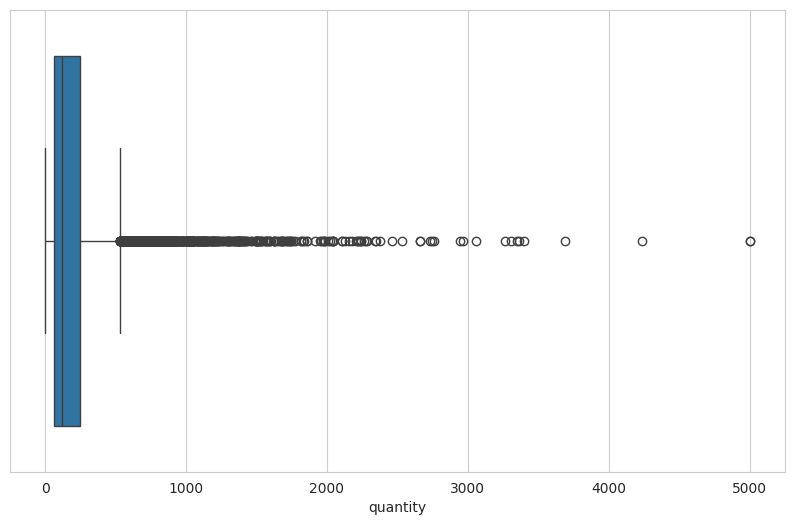

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=trades['quantity'])

Saving Trades Data Set

In [147]:
trades_clean.to_csv('trades_clean.csv', index=False)

# Customer Data Set

In [148]:
dim_customer.head()

,customer_key,customer_id,account_type,avg_trade_size_baseline
0,1,1,Retail,216.919900
1,2,2,Retail,71.936692
2,3,3,Retail,178.906048
3,4,4,Retail,214.291567
4,5,5,Retail,170.590392


In [149]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_key             5000 non-null   int64  
 1   customer_id              5000 non-null   int64  
 2   account_type             5000 non-null   object 
 3   avg_trade_size_baseline  5000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 156.4+ KB


In [150]:
dim_customer.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [151]:
dim_customer_clean = dim_customer.copy()

Dropping Customer Key
. It is identical to Customer ID and not used anywhere

In [152]:
dim_customer_clean.drop('customer_key', axis =1, inplace=True)

In [153]:
dim_customer_clean.head()

,customer_id,account_type,avg_trade_size_baseline
0,1,Retail,216.919900
1,2,Retail,71.936692
2,3,Retail,178.906048
3,4,Retail,214.291567
4,5,Retail,170.590392


In [154]:
dim_customer_clean.to_csv('dim_customer_clean.csv', index=False)

<Axes: xlabel='avg_trade_size_baseline', ylabel='Count'>

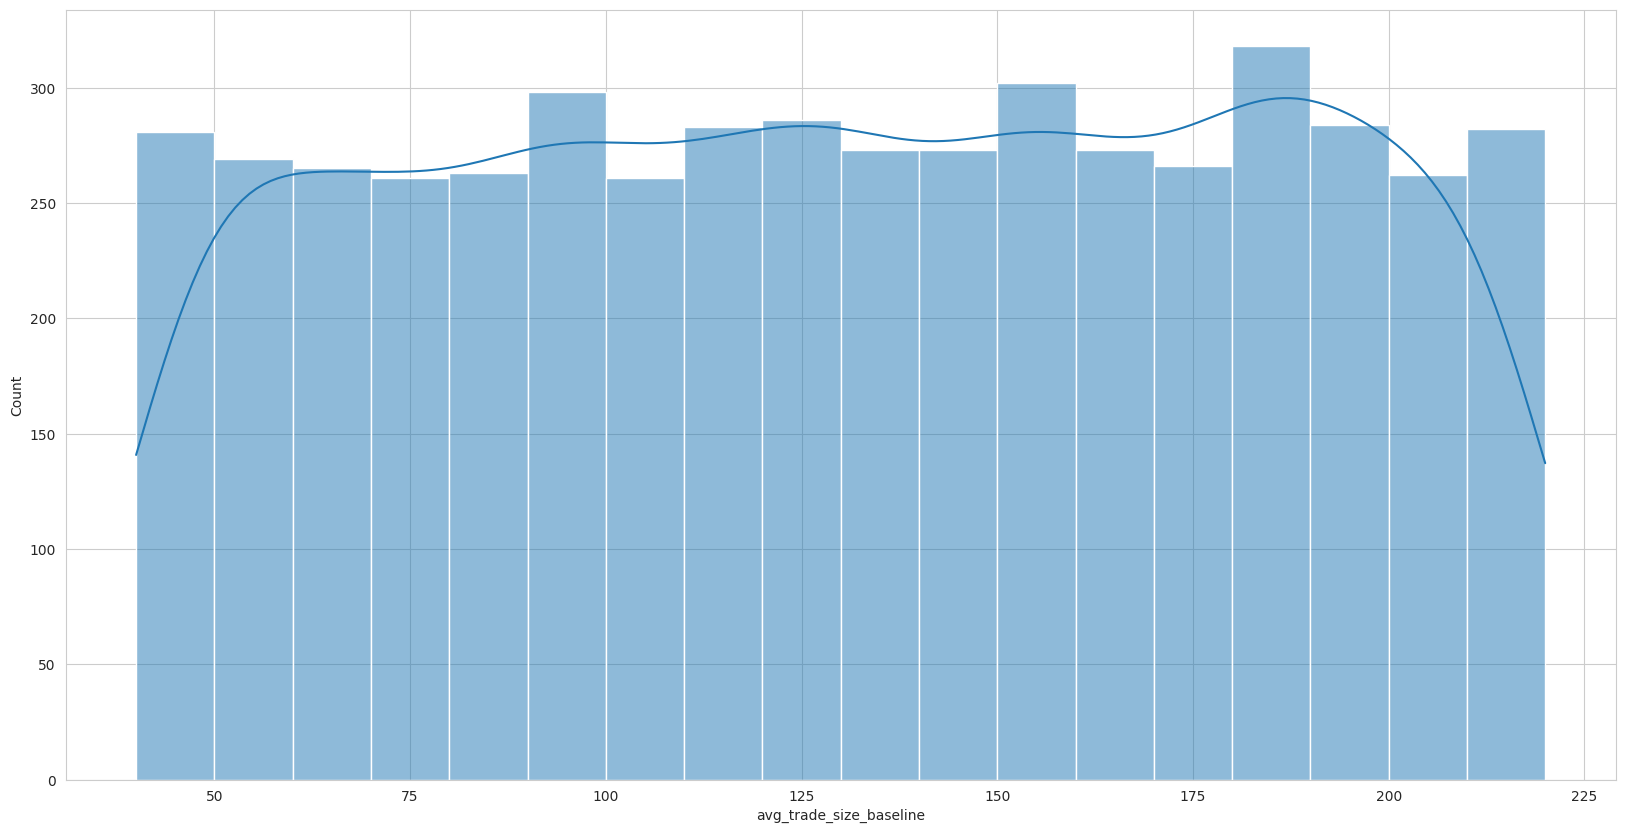

In [155]:
fig1 = plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.histplot(dim_customer_clean['avg_trade_size_baseline'], kde=True)

In [ ]:
Q1 = dim_customer_clean['avg_trade_size_baseline'].quantile(0.25)
Q3 = dim_customer_clean['avg_trade_size_baseline'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

In [157]:
outliers, upper, lower = detect_outliers(dim_customer['avg_trade_size_baseline'])
print(f'Percentage of Outliers: {len(outliers)/len(dim_customer)*100:.3f}%')
outliers

Percentage of Outliers: 0.000%


,avg_trade_size_baseline


<Axes: xlabel='avg_trade_size_baseline'>

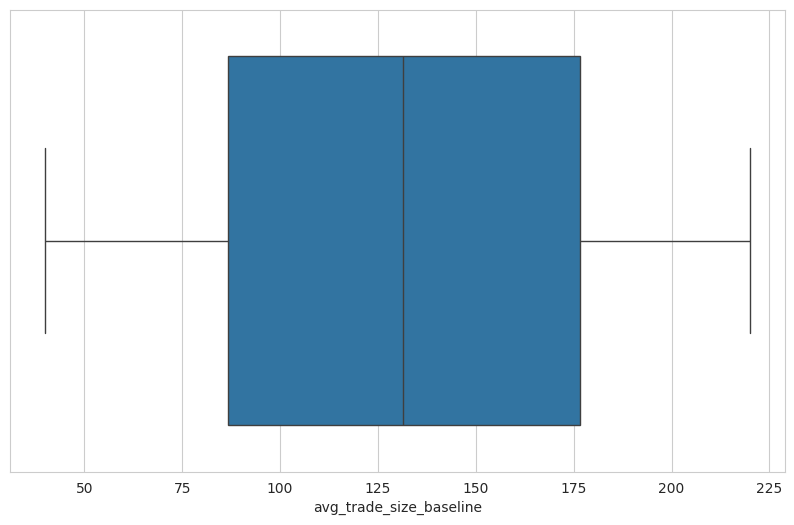

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dim_customer_clean['avg_trade_size_baseline'])

# Date Data Set

In [159]:
dim_date.head()

,date_key,date,day,month,month_name,quarter,year,day_of_week,day_name,is_weekend,is_holiday
0,20230102,2023-01-02,2,1,January,1,2023,1,Monday,False,False
1,20230103,2023-01-03,3,1,January,1,2023,2,Tuesday,False,False
2,20230104,2023-01-04,4,1,January,1,2023,3,Wednesday,False,False
3,20230105,2023-01-05,5,1,January,1,2023,4,Thursday,False,False
4,20230106,2023-01-06,6,1,January,1,2023,5,Friday,False,False


In [160]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date_key     504 non-null    int64 
 1   date         504 non-null    object
 2   day          504 non-null    int64 
 3   month        504 non-null    int64 
 4   month_name   504 non-null    object
 5   quarter      504 non-null    int64 
 6   year         504 non-null    int64 
 7   day_of_week  504 non-null    int64 
 8   day_name     504 non-null    object
 9   is_weekend   504 non-null    bool  
 10  is_holiday   504 non-null    bool  
dtypes: bool(2), int64(6), object(3)
memory usage: 36.6+ KB


Detecting Missing Data

In [163]:
sum_null = dim_date.isnull().sum()
perc_null_mean = dim_date.isnull().mean()*100
print(sum_null)
print('-'*40)
perc_null_mean

date_key       0
date           0
day            0
month          0
month_name     0
quarter        0
year           0
day_of_week    0
day_name       0
is_weekend     0
is_holiday     0
dtype: int64
----------------------------------------


,0
date_key,0.0
date,0.0
day,0.0
month,0.0
month_name,0.0
quarter,0.0
year,0.0
day_of_week,0.0
day_name,0.0
is_weekend,0.0


In [164]:
dim_date.duplicated().sum()

np.int64(0)

# Stock Data Set

In [165]:
dim_stock.head()

,stock_key,stock_ticker,company_name,liquidity_tier,sector,industry
0,1,STK001,STK001 Corp,Low,Energy,Utilities
1,2,STK002,STK002 Corp,Low,Consumer,Retail
2,3,STK003,STK003 Corp,Low,Technology,Software
3,4,STK004,STK004 Corp,Low,Finance,Asset Management
4,5,STK005,STK005 Corp,Low,Energy,Renewables


In [166]:
dim_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   stock_key       20 non-null     int64 
 1   stock_ticker    20 non-null     object
 2   company_name    20 non-null     object
 3   liquidity_tier  20 non-null     object
 4   sector          20 non-null     object
 5   industry        20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


In [168]:
dim_stock.describe()

,stock_key
count,20.00000
mean,10.50000
std,5.91608
min,1.00000
25%,5.75000
50%,10.50000
75%,15.25000
max,20.00000


In [171]:
dim_stock.duplicated().sum()

np.int64(0)

Detecting Missing Data

In [167]:
sum_null = dim_stock.isnull().sum()
perc_null_mean = dim_stock.isnull().mean()*100
print(sum_null)
print('-'*40)
perc_null_mean

stock_key         0
stock_ticker      0
company_name      0
liquidity_tier    0
sector            0
industry          0
dtype: int64
----------------------------------------


,0
stock_key,0.0
stock_ticker,0.0
company_name,0.0
liquidity_tier,0.0
sector,0.0
industry,0.0


# Data Integration and Feature Engineering

In [172]:
dim_customer = pd.read_csv('dim_customer_clean.csv')
dim_date = pd.read_csv('dim_date.csv')
dim_stock = pd.read_csv('dim_stock.csv')
daily_trade_price = pd.read_csv('stocks_clean.csv')
trades_clean = pd.read_csv('trades_clean.csv')

In [173]:
D1 = pd.merge(trades_clean, dim_stock, on="stock_ticker", how="left")

D1.head()

,transaction_id,timestamp,customer_id,stock_ticker,transaction_type,quantity,average_trade_size,cumulative_portfolio_value,stock_key,company_name,liquidity_tier,sector,industry
0,1,2023-01-02,4747,STK002,BUY,15,121.72625,2155.99,2,STK002 Corp,Low,Consumer,Retail
1,2,2023-01-02,4747,STK004,BUY,68,121.72625,4993.03,4,STK004 Corp,Low,Finance,Asset Management
2,3,2023-01-02,227,STK006,BUY,49,121.72625,6694.05,6,STK006 Corp,High,Energy,Oil & Gas
3,4,2023-01-02,4747,STK006,BUY,503,195.33000,73709.48,6,STK006 Corp,High,Energy,Oil & Gas
4,5,2023-01-02,3938,STK006,BUY,203,203.00000,27732.49,6,STK006 Corp,High,Energy,Oil & Gas


In [174]:
dim_customer.rename(columns={"account_type" : "customer_account_type"}, inplace=True)
dim_customer.head()

,customer_id,customer_account_type,avg_trade_size_baseline
0,1,Retail,216.919900
1,2,Retail,71.936692
2,3,Retail,178.906048
3,4,Retail,214.291567
4,5,Retail,170.590392


In [175]:
D1=pd.merge(D1, dim_customer, on=["customer_id"], how="left")
# D1.head()

In [176]:
dim_date = dim_date.rename(columns={"date": "timestamp"})

dim_date.head()

,date_key,timestamp,day,month,month_name,quarter,year,day_of_week,day_name,is_weekend,is_holiday
0,20230102,2023-01-02,2,1,January,1,2023,1,Monday,False,False
1,20230103,2023-01-03,3,1,January,1,2023,2,Tuesday,False,False
2,20230104,2023-01-04,4,1,January,1,2023,3,Wednesday,False,False
3,20230105,2023-01-05,5,1,January,1,2023,4,Thursday,False,False
4,20230106,2023-01-06,6,1,January,1,2023,5,Friday,False,False


In [177]:
D1= pd.merge( D1, dim_date , on="timestamp", how="left")

D1.head()

,transaction_id,timestamp,customer_id,stock_ticker,transaction_type,quantity,average_trade_size,cumulative_portfolio_value,stock_key,company_name,...,date_key,day,month,month_name,quarter,year,day_of_week,day_name,is_weekend,is_holiday
0,1,2023-01-02,4747,STK002,BUY,15,121.72625,2155.99,2,STK002 Corp,...,20230102,2,1,January,1,2023,1,Monday,False,False
1,2,2023-01-02,4747,STK004,BUY,68,121.72625,4993.03,4,STK004 Corp,...,20230102,2,1,January,1,2023,1,Monday,False,False
2,3,2023-01-02,227,STK006,BUY,49,121.72625,6694.05,6,STK006 Corp,...,20230102,2,1,January,1,2023,1,Monday,False,False
3,4,2023-01-02,4747,STK006,BUY,503,195.33000,73709.48,6,STK006 Corp,...,20230102,2,1,January,1,2023,1,Monday,False,False
4,5,2023-01-02,3938,STK006,BUY,203,203.00000,27732.49,6,STK006 Corp,...,20230102,2,1,January,1,2023,1,Monday,False,False


In [178]:
daily_trade_price.rename(columns={"date" : "timestamp"}, inplace=True)
daily_trade_price.head()

,timestamp,STK001,STK002,STK003,STK004,STK005,STK006,STK007,STK008,STK009,...,STK011,STK012,STK013,STK014,STK015,STK016,STK017,STK018,STK019,STK020
0,2023-01-02,117.63794,143.732847,10.829021,41.721087,145.478750,136.613229,193.549026,154.597180,190.646814,...,66.629920,30.019335,158.546534,132.388352,19.155342,78.409589,191.791965,105.076218,92.218536,96.962925
1,2023-01-03,117.63794,141.811103,10.840378,42.372205,150.451171,131.081439,189.433498,156.245870,188.642260,...,67.403967,29.177773,157.962636,132.316777,19.495879,81.278706,196.519348,105.143629,93.324523,96.498923
2,2023-01-04,117.63794,139.814796,10.824561,43.273956,150.121855,132.287593,185.192571,153.568772,199.054913,...,65.541600,28.336211,157.022235,128.554686,19.489534,79.565899,195.192089,106.084249,93.996184,96.034921
3,2023-01-05,117.63794,140.885311,10.874388,43.307331,154.264000,127.534322,189.023341,155.642891,201.061534,...,66.558603,27.706730,154.660460,120.788272,18.989024,83.375297,193.497711,104.311590,92.687024,96.281810
4,2023-01-06,117.63794,143.103993,11.212466,46.389494,151.434469,125.356736,185.290655,155.942939,203.068155,...,67.339732,27.283299,159.619771,112.131796,18.700643,80.443424,189.787155,109.664184,88.463448,97.103757


In [179]:
daily_trade_price_long = prices_long = daily_trade_price.melt(id_vars='timestamp',
                               var_name='stock_ticker',
                               value_name="stock_price")
daily_trade_price_long.head()

,timestamp,stock_ticker,stock_price
0,2023-01-02,STK001,117.63794
1,2023-01-03,STK001,117.63794
2,2023-01-04,STK001,117.63794
3,2023-01-05,STK001,117.63794
4,2023-01-06,STK001,117.63794


In [180]:
D1= pd.merge(D1,daily_trade_price_long, on=["stock_ticker", "timestamp"], how="left")
D1.head()

,transaction_id,timestamp,customer_id,stock_ticker,transaction_type,quantity,average_trade_size,cumulative_portfolio_value,stock_key,company_name,...,day,month,month_name,quarter,year,day_of_week,day_name,is_weekend,is_holiday,stock_price
0,1,2023-01-02,4747,STK002,BUY,15,121.72625,2155.99,2,STK002 Corp,...,2,1,January,1,2023,1,Monday,False,False,143.732847
1,2,2023-01-02,4747,STK004,BUY,68,121.72625,4993.03,4,STK004 Corp,...,2,1,January,1,2023,1,Monday,False,False,41.721087
2,3,2023-01-02,227,STK006,BUY,49,121.72625,6694.05,6,STK006 Corp,...,2,1,January,1,2023,1,Monday,False,False,136.613229
3,4,2023-01-02,4747,STK006,BUY,503,195.33000,73709.48,6,STK006 Corp,...,2,1,January,1,2023,1,Monday,False,False,136.613229
4,5,2023-01-02,3938,STK006,BUY,203,203.00000,27732.49,6,STK006 Corp,...,2,1,January,1,2023,1,Monday,False,False,136.613229


In [181]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   transaction_id              10000 non-null  int64  
 1   timestamp                   10000 non-null  object 
 2   customer_id                 10000 non-null  int64  
 3   stock_ticker                10000 non-null  object 
 4   transaction_type            10000 non-null  object 
 5   quantity                    10000 non-null  int64  
 6   average_trade_size          10000 non-null  float64
 7   cumulative_portfolio_value  10000 non-null  float64
 8   stock_key                   10000 non-null  int64  
 9   company_name                10000 non-null  object 
 10  liquidity_tier              10000 non-null  object 
 11  sector                      10000 non-null  object 
 12  industry                    10000 non-null  object 
 13  customer_account_type       1000

In [182]:
D1.rename(columns={"liquidity_tier": "stock_liquidity_tier"}, inplace=True)
D1.rename(columns={"industry": "stock_industry"}, inplace=True)
D1.rename(columns={"sector": "stock_sector"}, inplace = True)

In [183]:
D1["total_trade_amount"] = D1["quantity"] * D1["stock_price"]

In [184]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   transaction_id              10000 non-null  int64  
 1   timestamp                   10000 non-null  object 
 2   customer_id                 10000 non-null  int64  
 3   stock_ticker                10000 non-null  object 
 4   transaction_type            10000 non-null  object 
 5   quantity                    10000 non-null  int64  
 6   average_trade_size          10000 non-null  float64
 7   cumulative_portfolio_value  10000 non-null  float64
 8   stock_key                   10000 non-null  int64  
 9   company_name                10000 non-null  object 
 10  stock_liquidity_tier        10000 non-null  object 
 11  stock_sector                10000 non-null  object 
 12  stock_industry              10000 non-null  object 
 13  customer_account_type       1000

In [185]:
output_dataset = D1[['transaction_id',
        'timestamp',
        'customer_id',
        'stock_ticker',
        'transaction_type',
        'quantity',
        'average_trade_size',
        'stock_price',
        'total_trade_amount',
        'customer_account_type',
        'day_name',
        'is_weekend',
        'is_holiday',
        'stock_liquidity_tier',
        'stock_sector',
        'stock_industry'
    ]]
output_dataset.head()

,transaction_id,timestamp,customer_id,stock_ticker,transaction_type,quantity,average_trade_size,stock_price,total_trade_amount,customer_account_type,day_name,is_weekend,is_holiday,stock_liquidity_tier,stock_sector,stock_industry
0,1,2023-01-02,4747,STK002,BUY,15,121.72625,143.732847,2155.992711,Retail,Monday,False,False,Low,Consumer,Retail
1,2,2023-01-02,4747,STK004,BUY,68,121.72625,41.721087,2837.033907,Retail,Monday,False,False,Low,Finance,Asset Management
2,3,2023-01-02,227,STK006,BUY,49,121.72625,136.613229,6694.048200,Retail,Monday,False,False,High,Energy,Oil & Gas
3,4,2023-01-02,4747,STK006,BUY,503,195.33000,136.613229,68716.453976,Retail,Monday,False,False,High,Energy,Oil & Gas
4,5,2023-01-02,3938,STK006,BUY,203,203.00000,136.613229,27732.485402,Retail,Monday,False,False,High,Energy,Oil & Gas


In [186]:
output_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10000 non-null  int64  
 1   timestamp              10000 non-null  object 
 2   customer_id            10000 non-null  int64  
 3   stock_ticker           10000 non-null  object 
 4   transaction_type       10000 non-null  object 
 5   quantity               10000 non-null  int64  
 6   average_trade_size     10000 non-null  float64
 7   stock_price            10000 non-null  float64
 8   total_trade_amount     10000 non-null  float64
 9   customer_account_type  10000 non-null  object 
 10  day_name               10000 non-null  object 
 11  is_weekend             10000 non-null  bool   
 12  is_holiday             10000 non-null  bool   
 13  stock_liquidity_tier   10000 non-null  object 
 14  stock_sector           10000 non-null  object 
 15  sto

In [187]:
output_dataset.to_csv('final_dataset.csv', index=False)

# Data Encoding

In [ ]:
def encode_data(final_df: pd.DataFrame):
    df = final_df.copy()
    global_lookup = {}

    # 1. LABEL ENCODING 
    if 'stock_ticker' in df.columns:
        le = LabelEncoder()
        df['stock_ticker_encoded'] = le.fit_transform(df['stock_ticker'].astype(str))

        lookup_df = pd.DataFrame({
            'column_name': 'stock_ticker',
            'original_value': le.classes_,
            'encoded_value': range(len(le.classes_))
        })

        global_lookup['stock_ticker'] = lookup_df
        # save_csv(lookup_df, 'lookup_stock_ticker.csv')
        lookup_df.to_csv('lookup_stock_ticker.csv', index=False)


    # 2. ONE-HOT (k-1) 
    one_hot_cols = [
        'transaction_type',
        'stock_sector',
        'stock_industry',
        'customer_account_type',
        'day'
    ]

    for col in one_hot_cols:
      if col in df.columns:

        original_values = df[col].astype(str)

        dummies = pd.get_dummies(
            original_values,
            prefix=f"{col}_enc",
            drop_first=True
        ).astype(int)

        #ADD encoded columns 
        df = pd.concat([df, dummies], axis=1)

        lookup_rows = []

        encoded_categories = {
            c.replace(f"{col}_enc_", "") for c in dummies.columns
        }
        all_categories = set(original_values.unique())

        # Explicitly encoded categories
        for dummy_col in dummies.columns:
            original_val = dummy_col.replace(f"{col}_enc_", "")
            lookup_rows.append({
                'column_name': col,
                'original_value': original_val,
                'encoded_value': dummy_col
            })

        # Dropped baseline category → represented by ALL ZEROS
        dropped_category = list(all_categories - encoded_categories)
        if dropped_category:
            lookup_rows.append({
                'column_name': col,
                'original_value': dropped_category[0],
                'encoded_value': 'ALL_ZEROS (baseline)'
            })

        lookup_df = pd.DataFrame(lookup_rows)
        global_lookup[col] = lookup_df
        lookup_df.to_csv(f'lookup_{col}.csv', index=False)
        #save_csv(lookup_df, f'lookup_{col}.csv')


    # 3. BINARY ENCODING
    binary_cols = ['is_weekend', 'is_holiday']

    for col in binary_cols:
        if col in df.columns:
            encoded_col = f"{col}_enc"
            df[encoded_col] = df[col].astype(int)

            lookup_df = pd.DataFrame({
                'column_name': [col, col],
                'original_value': [0, 1],
                'encoded_value': [0, 1]
            })

            global_lookup[col] = lookup_df
            # save_csv(lookup_df, f'lookup_{col}.csv')
            lookup_df.to_csv(f'lookup_{col}.csv', index=False)

    #final output
    # save_csv(df, "FINAL_STOCKS.csv")
    df.to_csv("FINAL_STOCKS.csv", index=False)

    with open("encoded_schema.json", "w") as f:
      json.dump(list(df.columns), f)


In [ ]:
encode_data(output_dataset)

In [ ]:
def transform_stream_batch(stream_df: pd.DataFrame,
                           lookup_folder: str = ".",
                           final_csv_path: str = "FINAL_STOCKS.csv",
                           schema_path: str = "encoded_schema.json"):
    """
    Transforms a streamed micro-batch using precomputed lookup tables
    and appends it safely to the same FINAL_STOCKS.csv.
    """

    # 1. LOAD SCHEMA
    with open(schema_path, "r") as f:
        encoded_columns = json.load(f)

    # 2. LOAD LOOKUP TABLES
    lookup_tables = {}

    lookup_files = {
        'stock_ticker': 'lookup_stock_ticker.csv',
        'transaction_type': 'lookup_transaction_type.csv',
        'stock_sector': 'lookup_stock_sector.csv',
        'stock_industry': 'lookup_stock_industry.csv',
        'customer_account_type': 'lookup_customer_account_type.csv',
        'day': 'lookup_day.csv',
        'is_weekend': 'lookup_is_weekend.csv',
        'is_holiday': 'lookup_is_holiday.csv'
    }

    for key, file_name in lookup_files.items():
        path = os.path.join(lookup_folder, file_name)
        if os.path.exists(path):
            lookup_tables[key] = pd.read_csv(path)

    encoded_rows = []

   
    # 3. ENCODE EACH STREAM ROW
    for _, row in stream_df.iterrows():
        encoded_row = row.copy()

        # LABEL ENCODING
        if 'stock_ticker' in lookup_tables:
            lookup = lookup_tables['stock_ticker']
            mapping = dict(zip(lookup['original_value'], lookup['encoded_value']))
            encoded_row['stock_ticker_encoded'] = mapping.get(str(row['stock_ticker']), -1)

        # ONE-HOT (k-1) ENCODING
        for col, lookup in lookup_tables.items():
            if col in ['stock_ticker', 'is_weekend', 'is_holiday']:
                continue

            if col in row.index:
                value = str(row[col])

                # initialize all encoded columns to 0
                for enc in lookup['encoded_value']:
                    if enc.startswith(f"{col}_enc"):
                        encoded_row[enc] = 0

                match = lookup[lookup['original_value'].astype(str) == value]

                if not match.empty:
                    enc_val = match.iloc[0]['encoded_value']
                    if 'ALL_ZEROS' not in enc_val:
                        encoded_row[enc_val] = 1

        # BINARY ENCODING
        for col in ['is_weekend', 'is_holiday']:
            if col in row.index:
                encoded_row[f"{col}_enc"] = int(row[col])

        encoded_rows.append(encoded_row)

    encoded_stream_df = pd.DataFrame(encoded_rows)

    # 4. ENFORCE FROZEN SCHEMA
    encoded_stream_df = encoded_stream_df.reindex(columns=encoded_columns, fill_value=0)


    # 5. APPEND TO SAME FINAL CSV
    encoded_stream_df.to_csv(
        final_csv_path,
        mode="a",
        header=False,
        index=False
    )